In [41]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [42]:
{
  "MarkdownCell": {
    "cm_config": {
      "lineWrapping": True
    }
  },
  "CodeCell": {
    "cm_config": {
      "lineWrapping": True
    }
  }
}

{'MarkdownCell': {'cm_config': {'lineWrapping': True}},
 'CodeCell': {'cm_config': {'lineWrapping': True}}}

In [43]:
#import main packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy.stats as st

In [44]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [45]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [46]:
#import the dataset
train = pd.read_csv("train.csv")

In [47]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [48]:
#feature types
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')

qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [49]:
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [50]:
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

# Exploration

In [51]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:title={'center':'Log Normal'}, xlabel='SalePrice'>

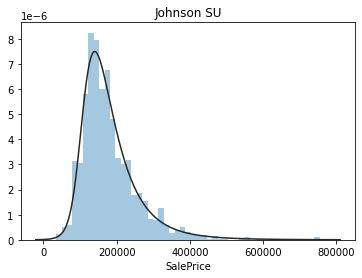

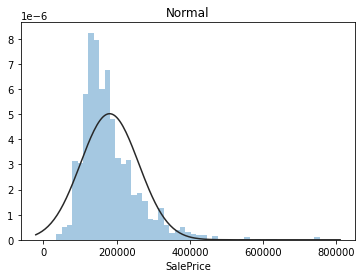

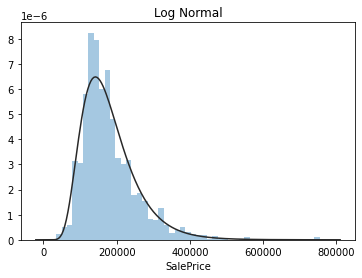

In [52]:
#distribution of SalePrice

y = train['SalePrice']

plt.figure(1)
plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

plt.figure(3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

#### Missing values

<AxesSubplot:>

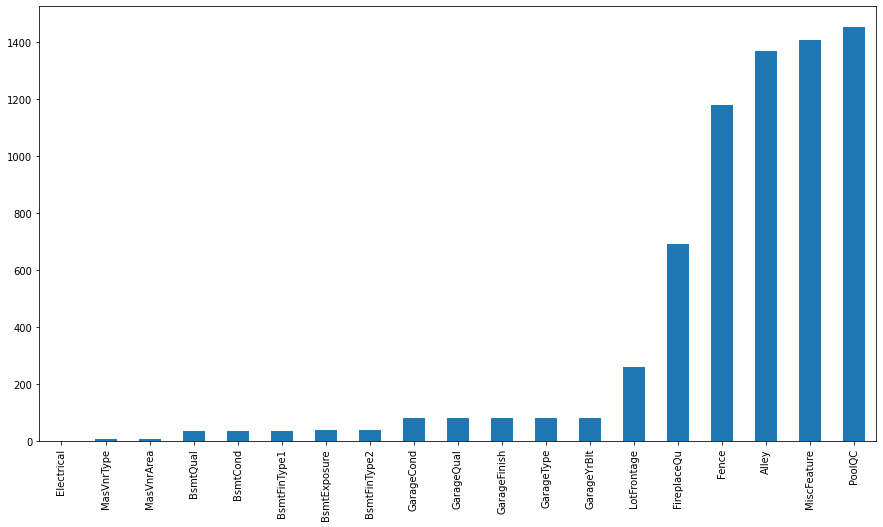

In [53]:
#columns that have missing values....
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure(figsize=(15,8))
missing.plot.bar()

#### Anova and categorical influence

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3680: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


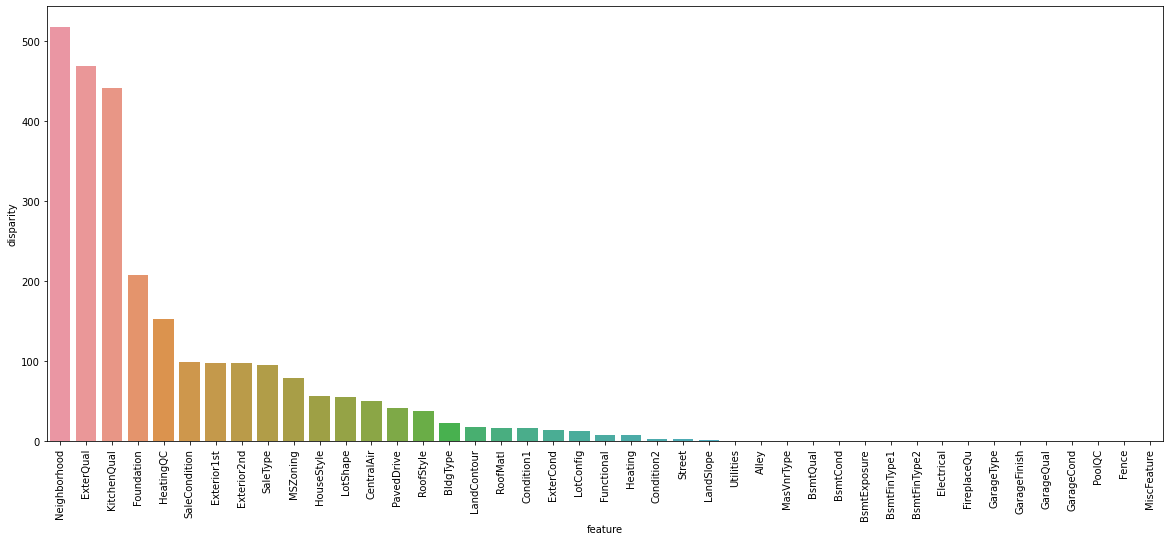

In [54]:
#one way anova calculations to see which categorical values are more influential on SalePrice
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = st.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals

    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(figsize=(20,8))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)
plt.show()

#### Encoding

In [55]:
#quick calculation of effect of categorical variables on SalePrice
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


#### Correlations

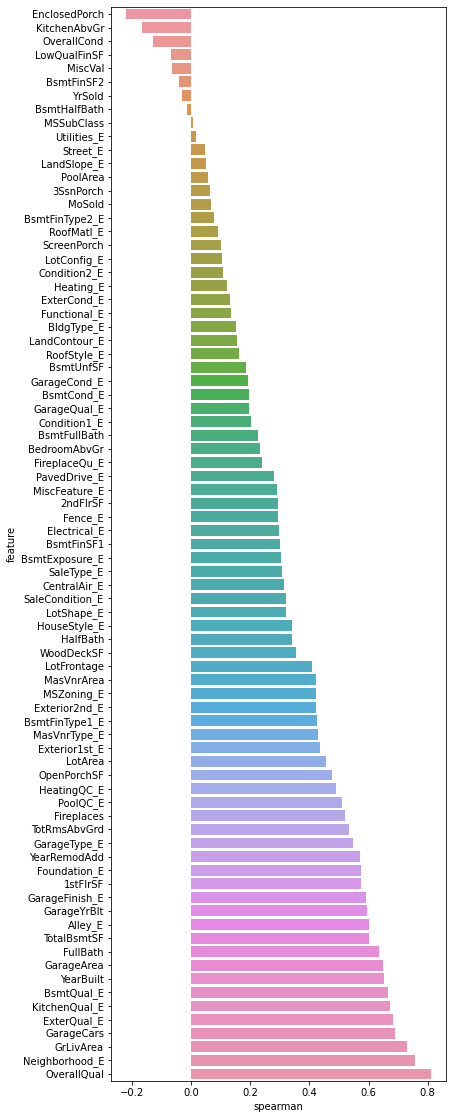

In [56]:
# Spearman Correlations with the SalePrice

def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(train, features)

In [57]:
#OverallQual is main criterion in establishing house price. Neighborhood has big influence, 
#partially it has some intrisinc value in itself, but also houses in certain regions tend to share 
#same characteristics (confunding) what causes similar valuations.

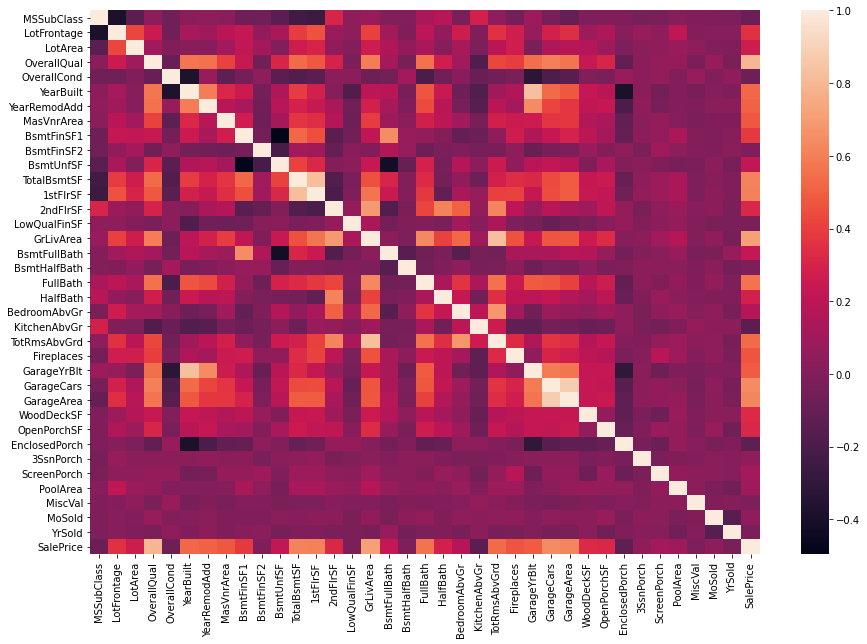

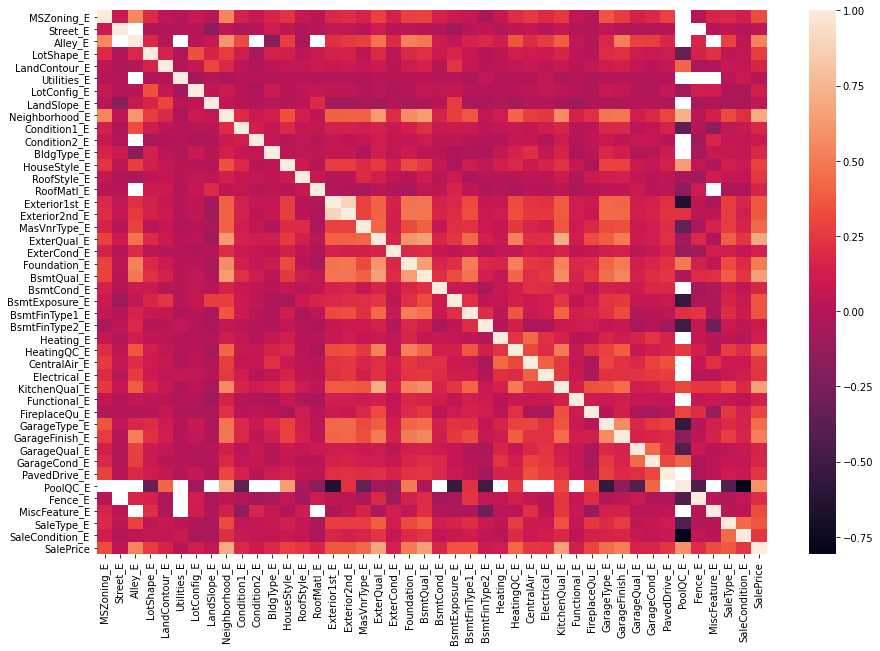

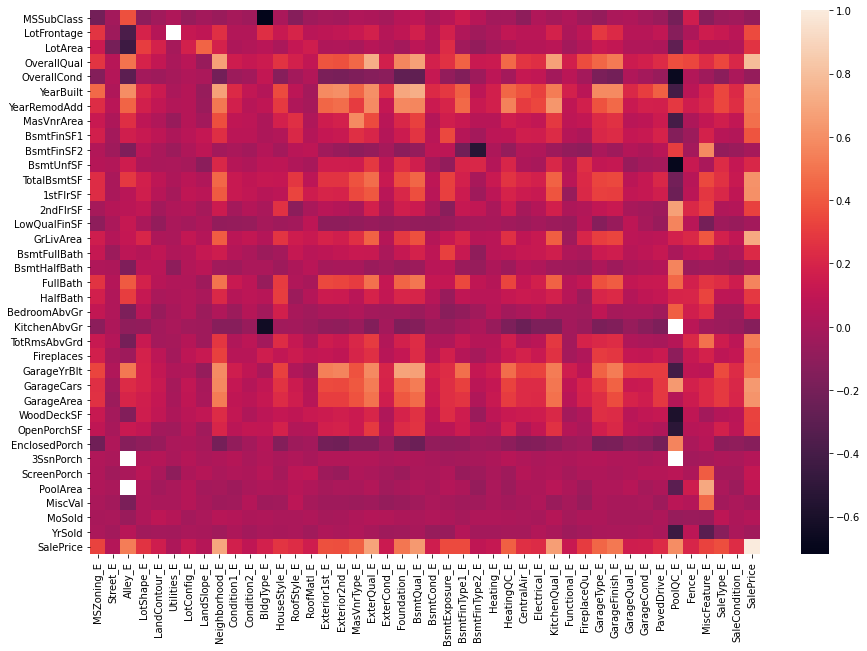

In [58]:
#correlations of quantitative prices
plt.figure(1, figsize=(15,10))
corr = train[quantitative+['SalePrice']].corr()
sns.heatmap(corr)

#encoded qualitative features correlations
plt.figure(2, figsize=(15,10))
corr = train[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr)

plt.figure(3, figsize=(15,10))
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = train[q1].corr(train[q2])
        

sns.heatmap(corr)
plt.show()

In [59]:
# There are many strong correlations between variables. 
# Garages seem to be built same year as houses, 
# basements have generally same area as first floor
# Garage area is strongly correlated with number of cars. 
# Neighborhood is correlated with lots of other variables and this confirms the idea that houses in same region share same characteristics. Dwelling type is negatively correlated with kitchen above grade square feet.

#### Pair Plots

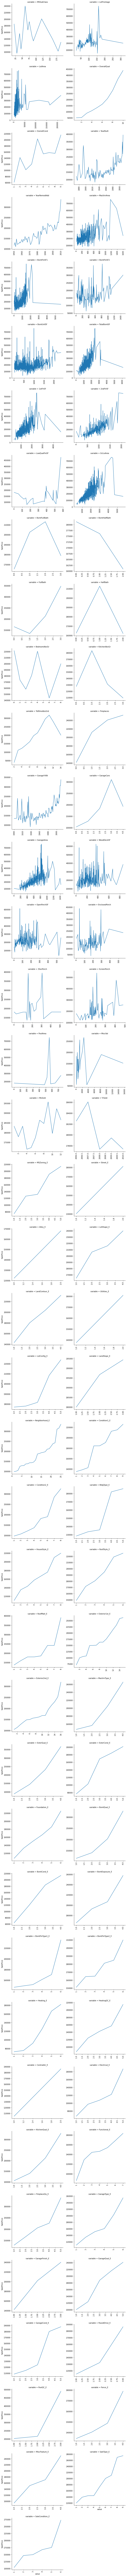

In [60]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative+qual_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(pairplot, "value", "SalePrice")

In [61]:
# There are lots of nonlinearities this may be the cause why some variables wont be selected by Lasso/Lars. 
# Some factors like YearBuilt, 1stFlrSF, 2ndFlrSF, Neighborhood_E look like they would benefit from
# adding quadratic term to regression. But on the other hand this will most probably provoke overfit.

#### Price segments

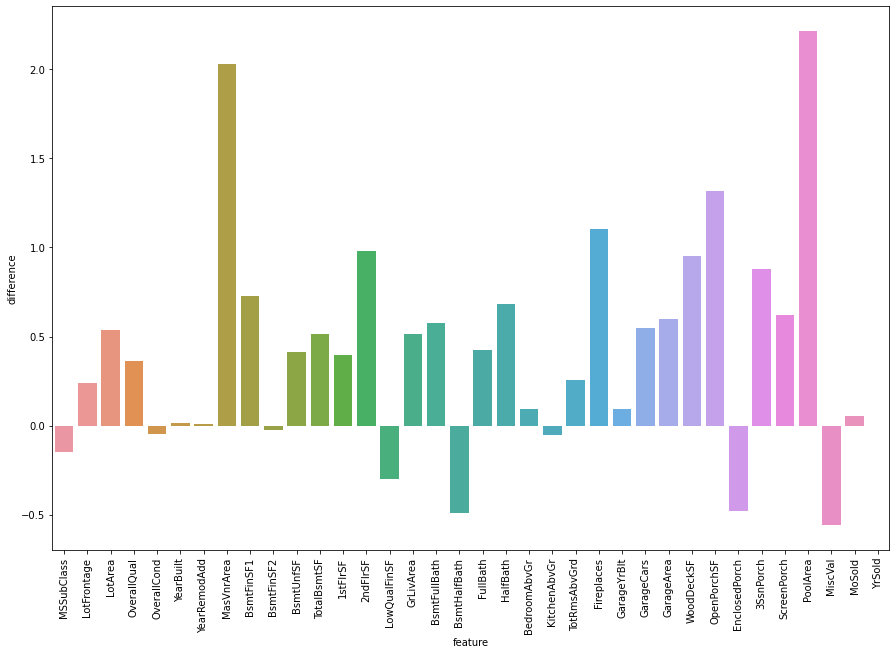

In [62]:
#seeing if there is a price change between normal houses and pricey houses per quantitative features
features = quantitative

standard = train[train['SalePrice'] < 200000]
pricey = train[train['SalePrice'] >= 200000]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[f].fillna(0.).mean() - standard[f].fillna(0.).mean())/(standard[f].fillna(0.).mean())
                      for f in features]

plt.figure(figsize = (15,10))
sns.barplot(data=diff, x='feature', y='difference')
x=plt.xticks(rotation=90)

In [63]:
# Here houses are divided in two price groups: cheap (under 200000) and expensive. 
# Then means of quantitative variables are compared. Expensive houses have pools, 
# better overall qual and condition, open porch and increased importance of MasVnrArea.

In [64]:
diff.head()

feature  difference
0   MSSubClass   -0.150366
1  LotFrontage    0.238321
2      LotArea    0.536645
3  OverallQual    0.361440
4  OverallCond   -0.047635

#### Clustering

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


0.7545961598434943


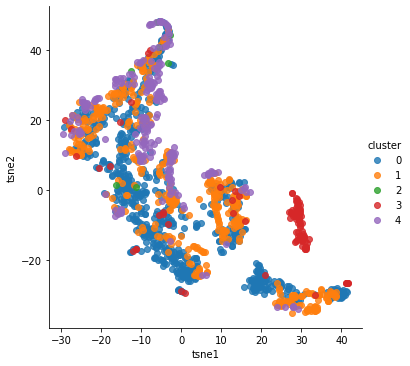

In [65]:
features = quantitative + qual_encoded

#use TSNE to see some clusters from high dimensions 
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = train[features].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)

#do principal component analysis for the top 30 components
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)

#use kmeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

In [66]:
# 30 First PCA Components explain 75% of variance. 
# There seems to be some clustering present but it is not enough for segmented regression

### Individual features

In [129]:
def explore(column):
    """
    This function helps with the initial high level exploration of a column so we don't keep repeating the steps
    """
    
    #print column's data type
    print("Data type of column:", train[column].dtype)
    
    #missing values
    print(train[column].isnull().sum(),"missing values out of",len(train['Id']),"(",(train[column].isnull().sum() / len(train['Id']) * 100),"%)")
    
    #print the values counts
    print(train[column].value_counts())
    
    #print proportions
    print(train[column].value_counts(normalize = True) * 100)
    
    #distribution
    print()
    print("Distribution of the data:")
    print()
    fig = px.histogram(train, x=column)
    fig.show()
    
    #if column is qualitative
    if column in qualitative:
        print()
        print("Variable is QUALITATIVE")
        print()
        train[column] = train[column].astype('category')
        if train[column].isnull().any():
            train[column] = train[column].cat.add_categories(['MISSING'])
            train[column] = train[column].fillna('MISSING')

        def boxplot(x, y, **kwargs):
            sns.boxplot(x=x, y=y)
            x=plt.xticks(rotation=90)

        f = pd.melt(train, id_vars=['SalePrice'], value_vars=column)
        g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=10)
        g = g.map(boxplot, "value", "SalePrice")
        plt.show()
        
        #what are some measures of central tendencies for each variable value
        mean_calc = train.groupby(column).SalePrice.mean().reset_index()
        print()
        print("The average selling price per variable value is:")
        print(mean_calc)
        print()
        
        std_calc = train.groupby(column).SalePrice.std().reset_index()
        print()
        print()
        print("The standard deviation / spread of price per variable value is:")
        print(std_calc)
        
    elif column in quantitative:
        print()
        print("Variable is QUANTITATIVE")
        print()
        #test column for normality
        test_normality = lambda x: st.shapiro(x.fillna(0))[1] < 0.01
        normal = pd.DataFrame(train[column])
        normal = normal.apply(test_normality)
        print()
        print ("The column normality:", not normal.all())


### MSSubClass     

Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [130]:
explore('MSSubClass')

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64

Distribution of the data:




Variable is QUANTITATIVE


The column normality: False


In [131]:
#it is being seen as an integer but it is actually a category so change it to that
train['MSSubClass'] = train['MSSubClass'].astype('object')

### MSZoning 

MSZoning: Identifies the general zoning classification of the sale.
		
A => Agriculture<br >
C => Commercial<br >
FV => Floating Village Residential<br >
I => Industrial<br >
RH => Residential High Density<br >
RL => Residential Low Density<br >
RP => Residential Low Density Park <br >
RM => Residential Medium Density<br >

Data type of column: category
0 missing values out of 1460 ( 0.0 %)
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



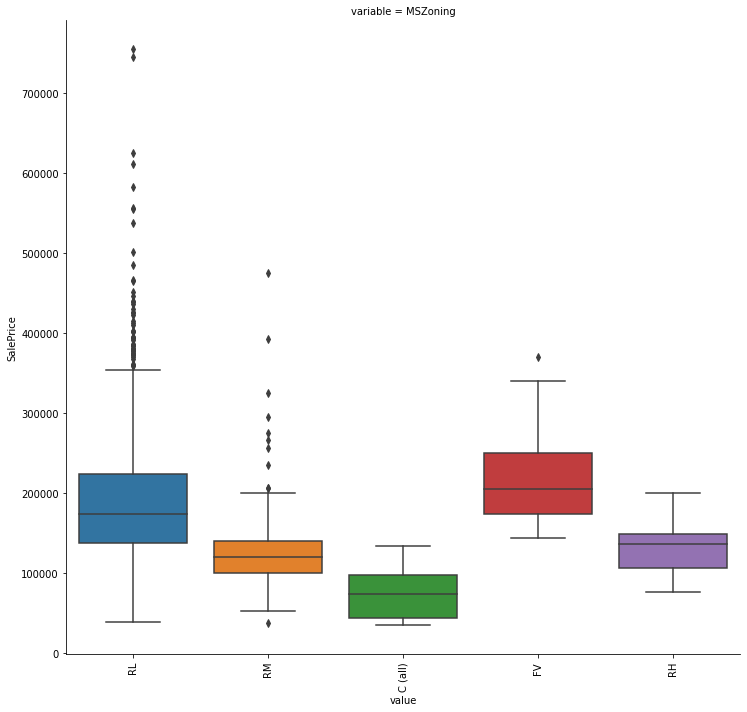


The average selling price per variable value is:
  MSZoning      SalePrice
0  C (all)   74528.000000
1       FV  214014.061538
2       RH  131558.375000
3       RL  191004.994787
4       RM  126316.830275



The standard deviation / spread of price per variable value is:
  MSZoning     SalePrice
0  C (all)  33791.092031
1       FV  52369.662067
2       RH  35714.118435
3       RL  80766.341319
4       RM  48521.689833


In [132]:
explore('MSZoning')

#### LotFrontage

Linear feet of street connected to property

In [133]:
explore('LotFrontage')

Data type of column: float64
259 missing values out of 1460 ( 17.73972602739726 %)
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
68.0      19
24.0      19
73.0      18
79.0      17
55.0      17
72.0      17
63.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
82.0      12
43.0      12
40.0      12
71.0      12
67.0      12
57.0      12
76.0      11
69.0      11
92.0      10
53.0      10
88.0      10
34.0      10
86.0      10
84.0       9
77.0       9
35.0       9
44.0       9
62.0       9
61.0       8
98.0       8
96.0       8
93.0       8
58.0       7
120.0      7
95.0       7
107.0      7
91.0       6
110.0      6
41.0       6
81.0       6
89.0       6
30.0       6
105.0      6
36.0       6
94.0       6
54.0       6
48.0       6
87.0       5
56.0       5
83.0       5
37.0       5
32.0       5
47.0       5
102.0      4
42.0       4
49.0       4
103.0  


Variable is QUANTITATIVE


The column normality: False


### LotArea: 

Lot size in square feet

In [72]:
explore('LotArea')

Data type of column: int64
0 missing values out of 1460 ( 0.0 %)
7200      25
9600      24
6000      17
8400      14
9000      14
10800     14
1680      10
7500       9
8125       8
6120       8
6240       8
9100       8
3182       7
7800       6
8450       6
9750       5
4435       5
5000       5
4500       5
10140      5
5400       5
10000      5
10400      5
9900       4
8544       4
7018       4
7000       4
13125      4
6600       4
8640       4
11700      4
8750       4
11250      4
8800       4
10625      4
9375       4
8500       4
8520       4
10440      3
6762       3
9920       3
8712       3
2522       3
11600      3
8777       3
7750       3
7875       3
10500      3
4426       3
9120       3
9200       3
14115      3
10200      3
2117       3
3675       3
9084       3
13891      3
2280       3
8000       3
12090      3
8012       3
11500      3
9842       2
9819       2
9790       2
7917       2
7758       2
8480       2
5925       2
10762      2
14803      2
11900      2


Variable is QUANTITATIVE


The column normality: False


### Street: 

Type of road access to property

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
Pave    1454
Grvl       6
Name: Street, dtype: int64
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



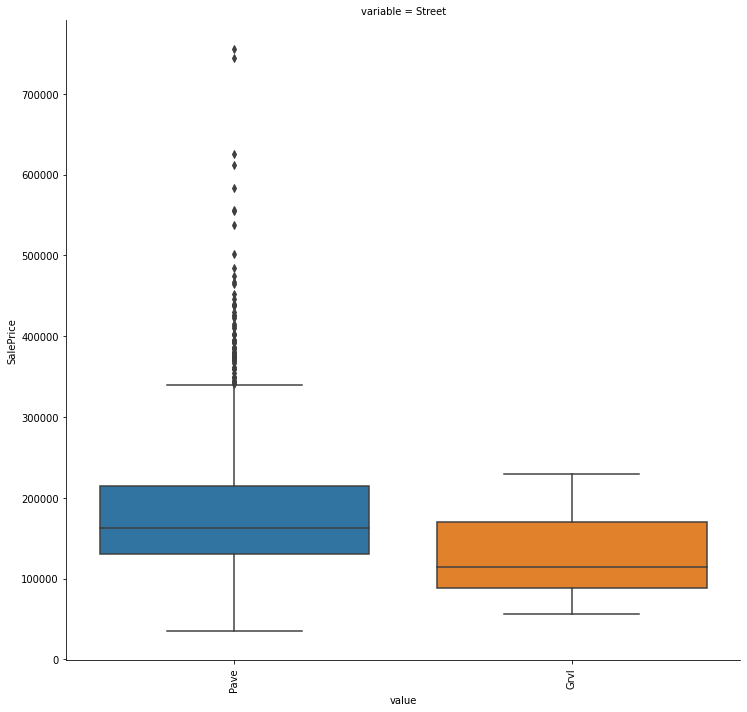


The average selling price per variable value is:
  Street      SalePrice
0   Grvl  130190.500000
1   Pave  181130.538514



The standard deviation / spread of price per variable value is:
  Street     SalePrice
0   Grvl  65446.253991
1   Pave  79446.597317


In [73]:
explore('Street')

In [74]:
#Way too unbalanced. Data is all in Pave so not very useful info here.

### Alley: 

Type of alley access to property

Grvl => Gravel<br >
Pave => Paved<br >
NA => No alley access

Data type of column: object
1369 missing values out of 1460 ( 93.76712328767123 %)
Grvl    50
Pave    41
Name: Alley, dtype: int64
Grvl    54.945055
Pave    45.054945
Name: Alley, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



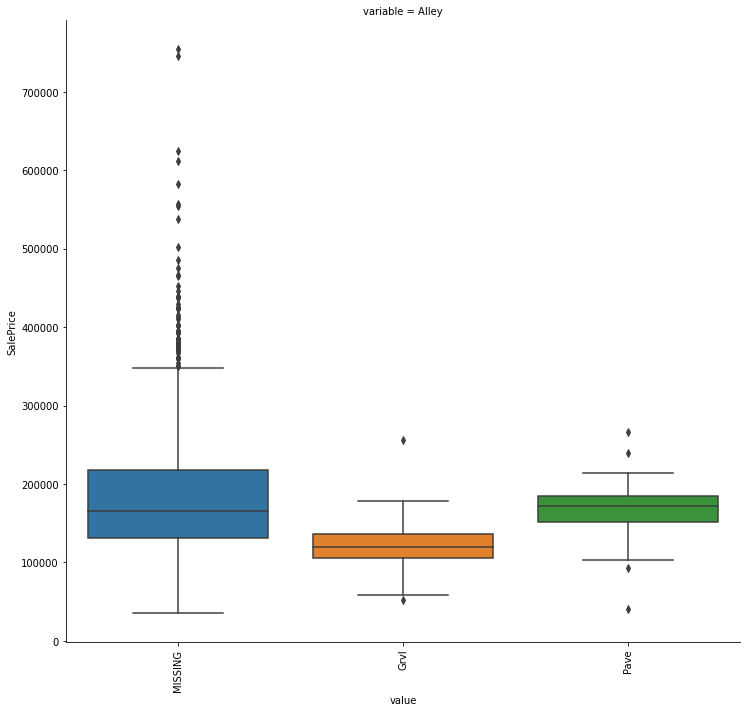


The average selling price per variable value is:
     Alley      SalePrice
0     Grvl  122219.080000
1     Pave  168000.585366
2  MISSING  183452.131483



The standard deviation / spread of price per variable value is:
     Alley     SalePrice
0     Grvl  34780.780734
1     Pave  38370.375243
2  MISSING  80667.145180


In [75]:
explore('Alley')

In [76]:
#missing values for Alley means there is no access to Alley for that house

### LotShape: 

General shape of property

Reg => Regular<br >
IR1 => Slightly irregular<br >
IR2 => Moderately Irregular<br >
IR3 => Irregular

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



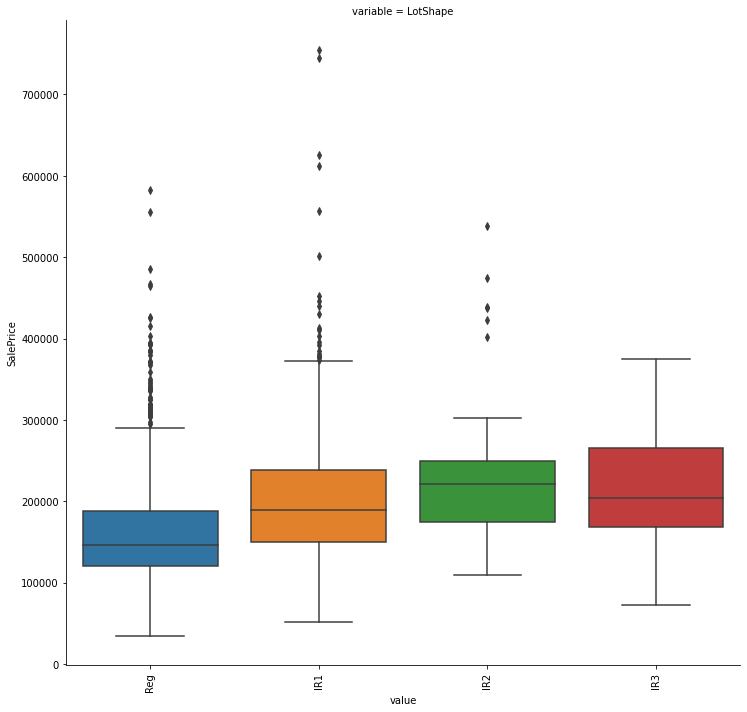


The average selling price per variable value is:
  LotShape      SalePrice
0      IR1  206101.665289
1      IR2  239833.365854
2      IR3  216036.500000
3      Reg  164754.818378



The standard deviation / spread of price per variable value is:
  LotShape     SalePrice
0      IR1  85858.489559
1      IR2  99669.427362
2      IR3  82540.334855
3      Reg  69673.427215


In [77]:
explore('LotShape')

In [78]:
#is there any definition of regular versus irregularity level? Maybe better to group all irregular ones?

### LandContour: 

Flatness of the property

Lvl => Near Flat/Level<br >
Bnk => Banked - Quick and significant rise from street grade to building<br >
HLS => Hillside - Significant slope from side to side<br >
Low => Depression<br >	

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



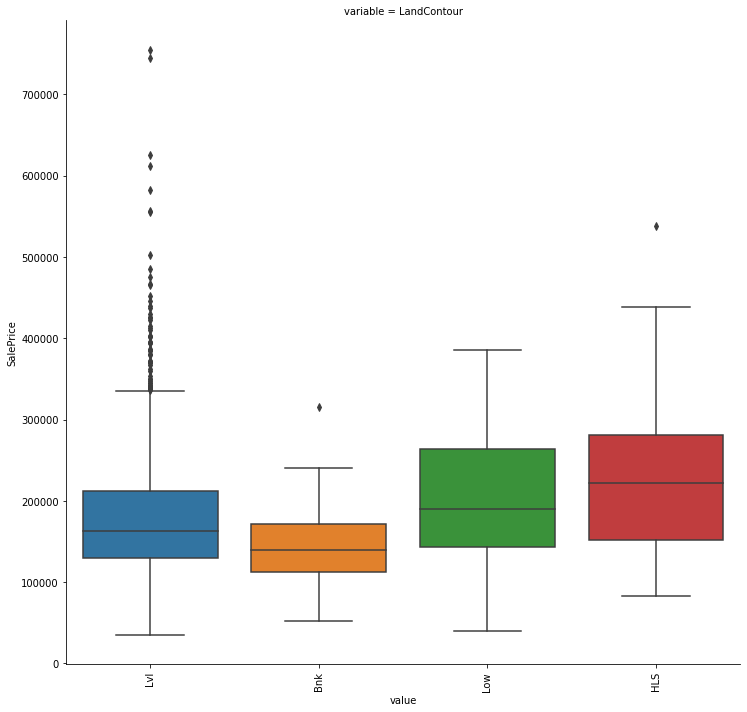


The average selling price per variable value is:
  LandContour      SalePrice
0         Bnk  143104.079365
1         HLS  231533.940000
2         Low  203661.111111
3         Lvl  180183.746758



The standard deviation / spread of price per variable value is:
  LandContour      SalePrice
0         Bnk   49361.244074
1         HLS  101790.139741
2         Low   83935.353620
3         Lvl   78463.567918


In [79]:
explore('LandContour')

### Utilities: 

Type of utilities available

AllPub => All public Utilities (E,G,W,& S)<br >
NoSewr => Electricity, Gas, and Water (Septic Tank)<br >
NoSeWa => Electricity and Gas Only<br >
ELO => Electricity only	

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



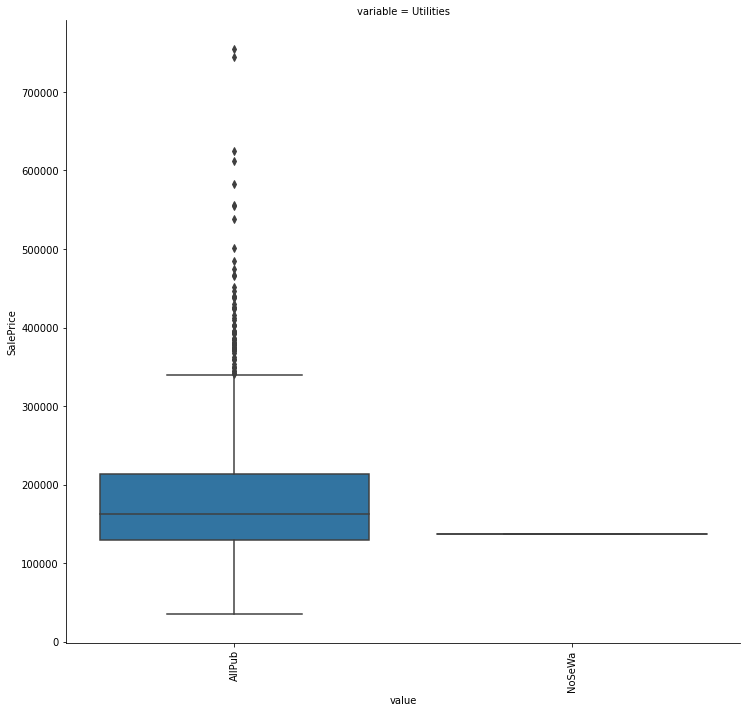


The average selling price per variable value is:
  Utilities     SalePrice
0    AllPub  180950.95682
1    NoSeWa  137500.00000



The standard deviation / spread of price per variable value is:
  Utilities     SalePrice
0    AllPub  79461.599814
1    NoSeWa           NaN


In [80]:
explore('Utilities')

In [81]:
#very unbalanced with 99% in AllPub. Makes sense for them to have all public services because it's a low density neighbourhood from MSZoning

### LotConfig: 

Lot configuration

Inside => Inside lot<br >
Corner => Corner lot<br >
CulDSac => Cul-de-sac<br >
FR2 => Frontage on 2 sides of property<br >
FR3 => Frontage on 3 sides of property

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



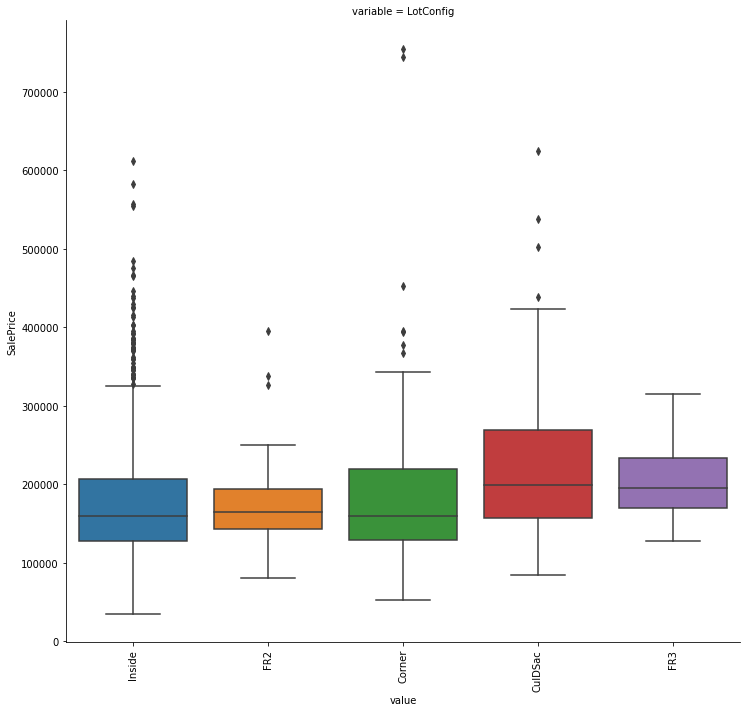


The average selling price per variable value is:
  LotConfig      SalePrice
0    Corner  181623.425856
1   CulDSac  223854.617021
2       FR2  177934.574468
3       FR3  208475.000000
4    Inside  176938.047529



The standard deviation / spread of price per variable value is:
  LotConfig     SalePrice
0    Corner  84466.041222
1   CulDSac  93117.546586
2       FR2  62788.926829
3       FR3  78379.222374
4    Inside  76426.805787


In [82]:
explore('LotConfig')

### LandSlope: 

Slope of property

Gtl => Gentle slope<br>
Mod => Moderate Slope<br>
Sev => Severe Slope

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



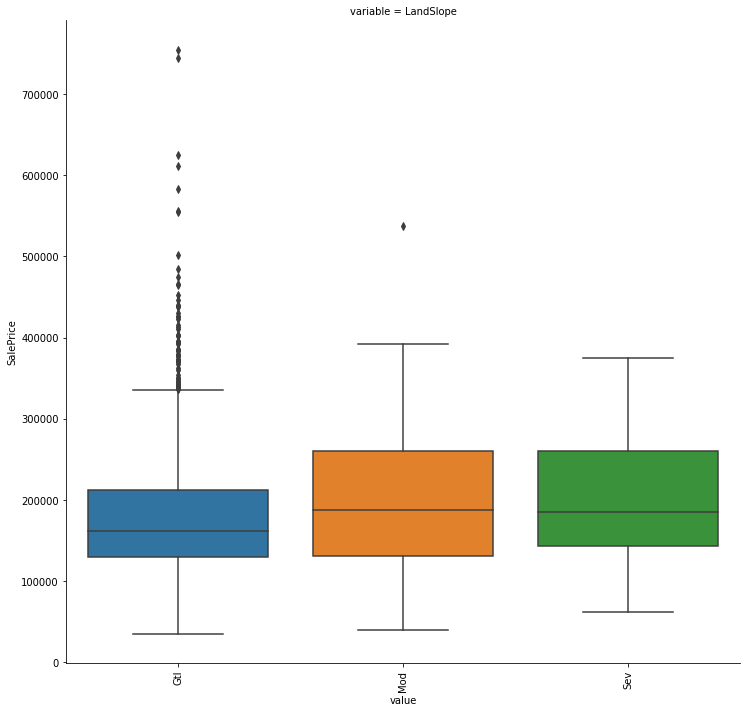


The average selling price per variable value is:
  LandSlope      SalePrice
0       Gtl  179956.799566
1       Mod  196734.138462
2       Sev  204379.230769



The standard deviation / spread of price per variable value is:
  LandSlope     SalePrice
0       Gtl  78669.369151
1       Mod  92375.358116
2       Sev  86729.922409


In [83]:
explore('LandSlope')

In [84]:
#large % is Gtl. What is the difference between this and LandContour which seems to be talking about banking as well?

### Neighborhood: 

Physical locations within Ames city limits

Blmngtn => Bloomington Heights<br>
Blueste => Bluestem<br>
BrDale => Briardale<br>
BrkSide => Brookside<br>
ClearCr => Clear Creek<br>
CollgCr => College Creek<br>
Crawfor => Crawford<br>
Edwards => Edwards<br>
Gilbert => Gilbert<br>
IDOTRR => Iowa DOT and Rail Road<br>
MeadowV => Meadow Village<br>
Mitchel => Mitchell<br>
Names => North Ames<br>
NoRidge => Northridge<br>
NPkVill => Northpark Villa<br>
NridgHt => Northridge Heights<br>
NWAmes => Northwest Ames<br>
OldTown => Old Town<br>
SWISU => South & West of Iowa State University<br>
Sawyer => Sawyer<br>
SawyerW => Sawyer West<br>
Somerst => Somerset<br>
StoneBr => Stone Brook<br>
Timber => Timberland<br>
Veenker => Veenker

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
SWISU       1.712329
StoneBr     1.712329
MeadowV     1.164384
Blmngtn     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
N


Variable is QUALITATIVE



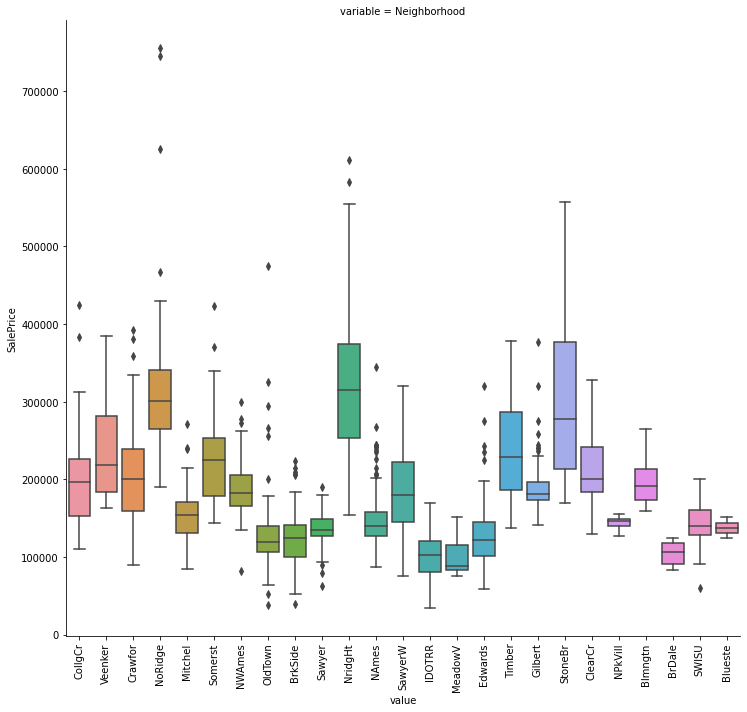


The average selling price per variable value is:
   Neighborhood      SalePrice
0       Blmngtn  194870.882353
1       Blueste  137500.000000
2        BrDale  104493.750000
3       BrkSide  124834.051724
4       ClearCr  212565.428571
5       CollgCr  197965.773333
6       Crawfor  210624.725490
7       Edwards  128219.700000
8       Gilbert  192854.506329
9        IDOTRR  100123.783784
10      MeadowV   98576.470588
11      Mitchel  156270.122449
12        NAmes  145847.080000
13      NPkVill  142694.444444
14       NWAmes  189050.068493
15      NoRidge  335295.317073
16      NridgHt  316270.623377
17      OldTown  128225.300885
18        SWISU  142591.360000
19       Sawyer  136793.135135
20      SawyerW  186555.796610
21      Somerst  225379.837209
22      StoneBr  310499.000000
23       Timber  242247.447368
24      Veenker  238772.727273



The standard deviation / spread of price per variable value is:
   Neighborhood      SalePrice
0       Blmngtn   30393.229219
1       Blueste

In [85]:
explore('Neighborhood')

In [86]:
# for these suburbs, can one get their populations (connected to density?)
# and can we get the average incomes in there as well as a measure of affluence?
# metrics can be found here: https://www.census.gov/quickfacts/fact/table/US/SEX255219

### Condition1: 

Proximity to various conditions

Artery => Adjacent to arterial street<br>
Feedr => Adjacent to feeder street<br>
Norm => Normal<br>
RRNn => Within 200' of North-South Railroad<br>
RRAn => Adjacent to North-South Railroad<br>
PosN => Near positive off-site feature--park, greenbelt, etc.<br>
PosA => Adjacent to postive off-site feature<br>
RRNe => Within 200' of East-West Railroad<br>
RRAe => Adjacent to East-West Railroad

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn       0.342466
RRNe       0.136986
Name: Condition1, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



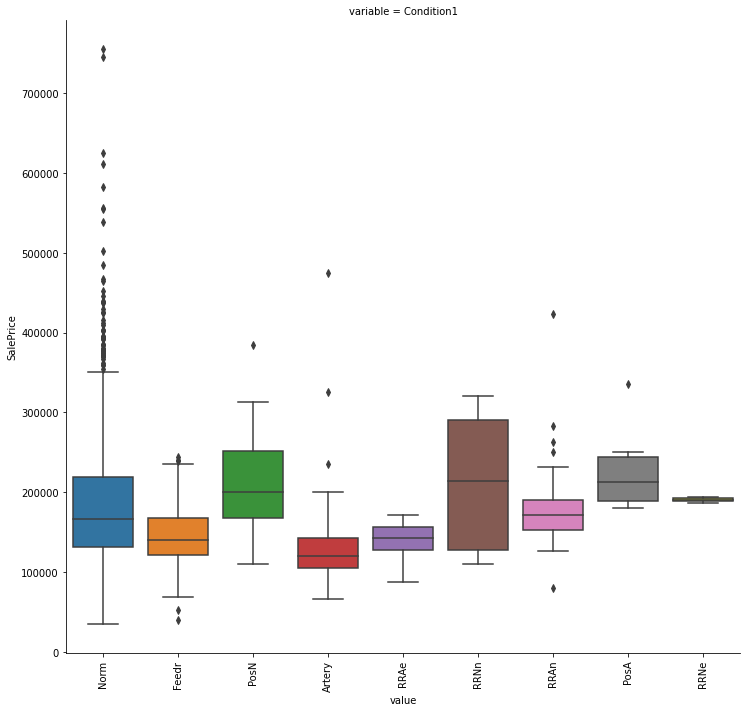


The average selling price per variable value is:
  Condition1      SalePrice
0     Artery  135091.666667
1      Feedr  142475.481481
2       Norm  184495.492063
3       PosA  225875.000000
4       PosN  215184.210526
5       RRAe  138400.000000
6       RRAn  184396.615385
7       RRNe  190750.000000
8       RRNn  212400.000000



The standard deviation / spread of price per variable value is:
  Condition1     SalePrice
0     Artery  66226.660548
1      Feedr  42157.290117
2       Norm  81256.980125
3       PosA  52348.932313
4       PosN  65256.536609
5       RRAe  24030.813553
6       RRAn  66177.922070
7       RRNe   5303.300859
8       RRNn  93823.238060


In [87]:
explore('Condition1')

### Condition2: 

Proximity to various conditions (if more than one is present)

Artery => Adjacent to arterial street<br>
Feedr => Adjacent to feeder street<br>
Norm => Normal<br>
RRNn => Within 200' of North-South Railroad<br>
RRAn => Adjacent to North-South Railroad<br>
PosN => Near positive off-site feature--park, greenbelt, etc.<br>
PosA => Adjacent to postive off-site feature<br>
RRNe => Within 200' of East-West Railroad<br>
RRAe => Adjacent to East-West Railroad

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64
Norm      98.972603
Feedr      0.410959
Artery     0.136986
RRNn       0.136986
PosN       0.136986
RRAe       0.068493
RRAn       0.068493
PosA       0.068493
Name: Condition2, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



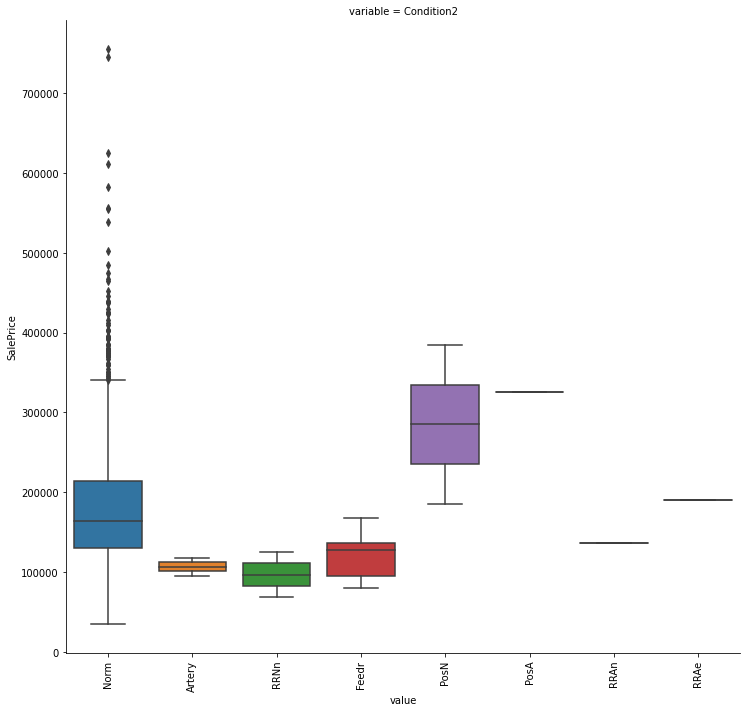


The average selling price per variable value is:
  Condition2      SalePrice
0     Artery  106500.000000
1      Feedr  121166.666667
2       Norm  181169.405536
3       PosA  325000.000000
4       PosN  284875.000000
5       RRAe  190000.000000
6       RRAn  136905.000000
7       RRNn   96750.000000



The standard deviation / spread of price per variable value is:
  Condition2      SalePrice
0     Artery   16263.455967
1      Feedr   33544.994659
2       Norm   79337.735547
3       PosA            NaN
4       PosN  141598.132933
5       RRAe            NaN
6       RRAn            NaN
7       RRNn   39951.533137


In [88]:
explore('Condition2')

In [89]:
#very unevenly distributed for Condition2. Might be quite useless

### BldgType: 

Type of dwelling

1Fam => Single-family Detached<br>
2FmCon => Two-family Conversion; originally built as one-family dwelling<br>
Duplx => Duplex<br>
TwnhsE => Townhouse End Unit<br>
TwnhsI => Townhouse Inside Unit

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
1Fam      83.561644
TwnhsE     7.808219
Duplex     3.561644
Twnhs      2.945205
2fmCon     2.123288
Name: BldgType, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



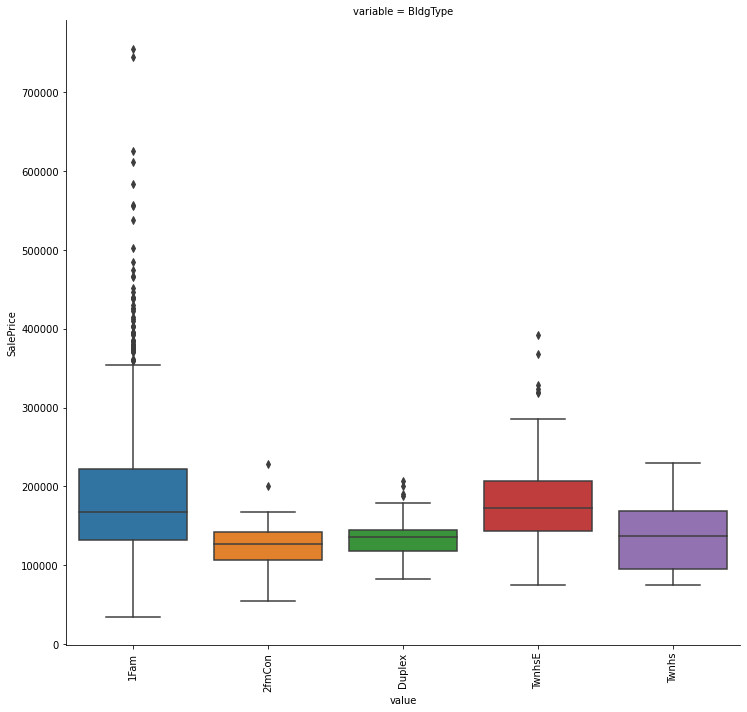


The average selling price per variable value is:
  BldgType      SalePrice
0     1Fam  185763.807377
1   2fmCon  128432.258065
2   Duplex  133541.076923
3    Twnhs  135911.627907
4   TwnhsE  181959.342105



The standard deviation / spread of price per variable value is:
  BldgType     SalePrice
0     1Fam  82648.502922
1   2fmCon  35458.545158
2   Duplex  27833.249197
3    Twnhs  41013.222080
4   TwnhsE  60626.108918


In [90]:
explore('BldgType')

### HouseStyle: 

Style of dwelling

1Story => One story<br>
1.5Fin => One and one-half story: 2nd level finished<br>
1.5Unf => One and one-half story: 2nd level unfinished<br>
2Story => Two story<br>
2.5Fin => Two and one-half story: 2nd level finished<br>
2.5Unf => Two and one-half story: 2nd level unfinished<br>
SFoyer => Split Foyer<br>
SLvl => Split Level

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
SLvl       4.452055
SFoyer     2.534247
1.5Unf     0.958904
2.5Unf     0.753425
2.5Fin     0.547945
Name: HouseStyle, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



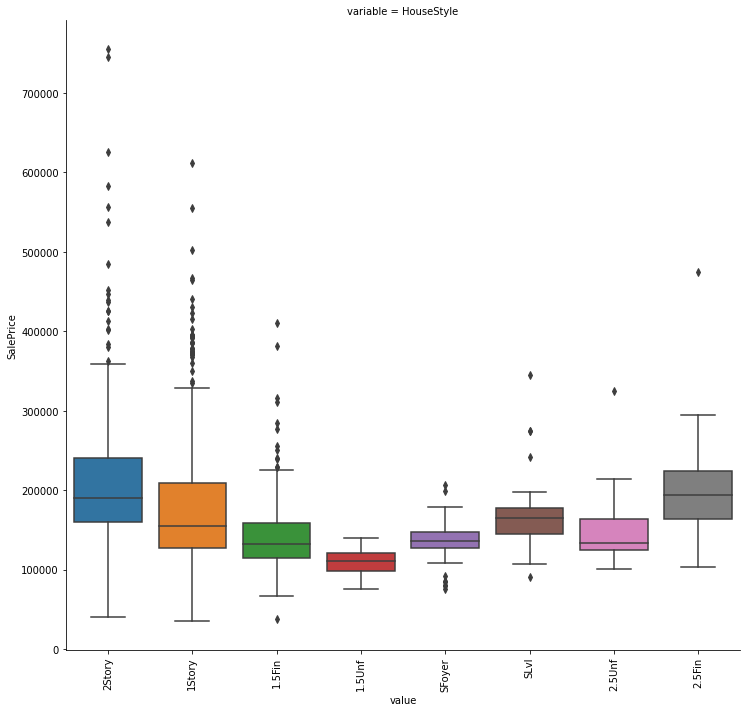


The average selling price per variable value is:
  HouseStyle      SalePrice
0     1.5Fin  143116.740260
1     1.5Unf  110150.000000
2     1Story  175985.477961
3     2.5Fin  220000.000000
4     2.5Unf  157354.545455
5     2Story  210051.764045
6     SFoyer  135074.486486
7       SLvl  166703.384615



The standard deviation / spread of price per variable value is:
  HouseStyle      SalePrice
0     1.5Fin   54277.941119
1     1.5Unf   19036.473090
2     1Story   77055.715011
3     2.5Fin  118211.976671
4     2.5Unf   63934.128032
5     2Story   87339.213570
6     SFoyer   30480.898192
7       SLvl   38305.161339


In [91]:
explore('HouseStyle')

In [92]:
#how does this tie in with the MSubclass which also has details around stories etc? The first column could be reduntant

### OverallQual: 

Rates the overall material and finish of the house

10 => Very Excellent<br>
9 => Excellent<br>
8 => Very Good<br>
7 => Good<br>
6 => Above Average<br>
5 => Average<br>
4 => Below Average<br>
3 => Fair<br>
2 => Poor<br>
1 => Very Poor<br>

In [93]:
explore('OverallQual')

Data type of column: int64
0 missing values out of 1460 ( 0.0 %)
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
5     27.191781
6     25.616438
7     21.849315
8     11.506849
4      7.945205
9      2.945205
3      1.369863
10     1.232877
2      0.205479
1      0.136986
Name: OverallQual, dtype: float64

Distribution of the data:




Variable is QUANTITATIVE


The column normality: False


### OverallCond: 

Rates the overall condition of the house

10 => Very Excellent<br>
9 => Excellent<br>
8 => Very Good<br>
7 => Good<br>
6 => Above Average<br>
5 => Average<br>
4 => Below Average<br>
3 => Fair<br>
2 => Poor<br>
1 => Very Poor

In [94]:
explore('OverallCond')

Data type of column: int64
0 missing values out of 1460 ( 0.0 %)
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
5    56.232877
6    17.260274
7    14.041096
8     4.931507
4     3.904110
3     1.712329
9     1.506849
2     0.342466
1     0.068493
Name: OverallCond, dtype: float64

Distribution of the data:




Variable is QUANTITATIVE


The column normality: False


### YearBuilt: 

Original construction date

In [95]:
explore('YearBuilt')

Data type of column: int64
0 missing values out of 1460 ( 0.0 %)
2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1998    25
1999    25
1954    24
2000    24
1958    24
1965    24
1970    24
2008    23
1972    23
2002    23
1968    22
1971    22
2001    20
1957    20
1950    20
1962    19
1994    19
2009    18
1940    18
1995    18
1966    18
1960    17
1910    17
1993    17
1967    16
1978    16
1963    16
1955    16
1925    16
1964    15
1996    15
1941    15
1948    14
1969    14
1997    14
1961    14
1956    14
1992    13
1953    12
1949    12
1990    12
1988    11
1973    11
1974    10
1915    10
1980    10
1900    10
1984     9
1979     9
1926     9
1936     9
1930     9
1975     8
1916     8
1939     8
1922     8
1914     7
1918     7
1928     7
1946     7
1923     7
1924     7
1982     6
1935     6
1931     6
1951     6
1921     6
1945     6
1952     5
1947     5
1981     5
1937     5
1985     5
1986     5
1991     5
1929     4



Variable is QUANTITATIVE


The column normality: False


### YearRemodAdd: 

Remodel date (same as construction date if no remodeling or additions)

In [96]:
explore('YearRemodAdd')

Data type of column: int64
0 missing values out of 1460 ( 0.0 %)
1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
1972     20
1993     19
1965     19
1959     18
1971     18
1992     17
1968     17
1978     16
1990     15
1966     15
1958     15
1969     14
1962     14
1954     14
1991     14
1963     13
1980     12
1960     12
1967     12
1989     11
1973     11
1964     11
1987     10
1953     10
1956     10
1979     10
1975     10
1985      9
1955      9
1957      9
1988      9
1961      8
1981      8
1974      7
1982      7
1984      7
2010      6
1983      5
1986      5
1952      5
1951      4
Name: YearRemodAdd, dtype: int64
1950    12.191781
2006     6.643836
2007     5.205479
2005     5.000000
2004     4.246575
2000     3.767123
2003     3.493151
2002     3.287671
2008     2.739726
1996    


Variable is QUANTITATIVE


The column normality: False


In [97]:
#from this and year built, can we create a new feature, Modelled = Yes or No?

### RoofStyle: 

Type of roof

Flat => Flat<br>
Gable => Gable<br>
Gambrel => Gabrel (Barn)<br>
Hip => Hip<br>
Mansard => Mansard<br>
Shed => Shed

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
Gable      78.150685
Hip        19.589041
Flat        0.890411
Gambrel     0.753425
Mansard     0.479452
Shed        0.136986
Name: RoofStyle, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



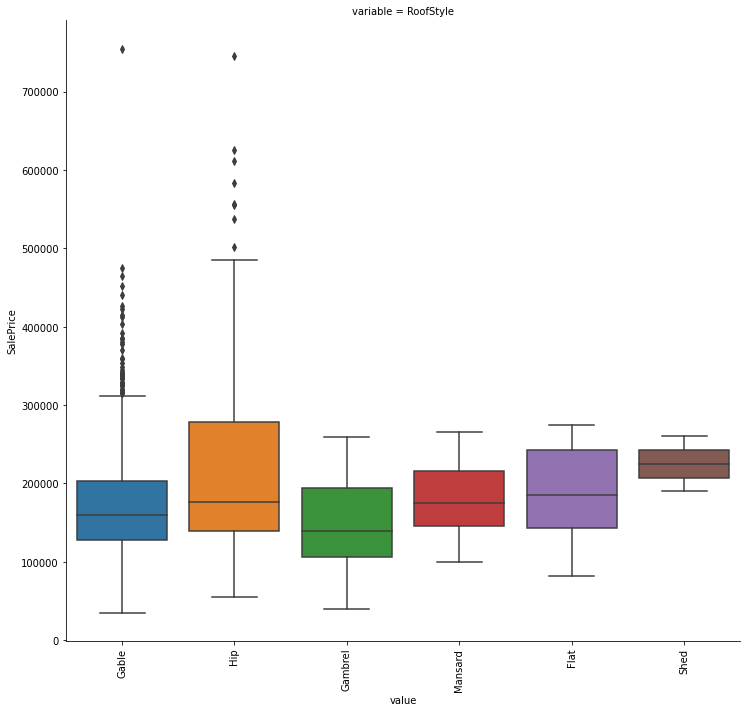


The average selling price per variable value is:
  RoofStyle      SalePrice
0      Flat  194690.000000
1     Gable  171483.956179
2   Gambrel  148909.090909
3       Hip  218876.933566
4   Mansard  180568.428571
5      Shed  225000.000000



The standard deviation / spread of price per variable value is:
  RoofStyle      SalePrice
0      Flat   62522.963515
1     Gable   66331.237296
2   Gambrel   67013.527807
3       Hip  111549.603563
4   Mansard   58057.624627
5      Shed   49497.474683


In [98]:
explore('RoofStyle')

### RoofMatl: 

Roof material

ClyTile => Clay or Tile<br>
CompShg => Standard (Composite) Shingle<br>
Membran => Membrane<br>
Metal => Metal<br>
Roll => Roll<br>
Tar&Grv => Gravel & Tar<br>
WdShake => Wood Shakes<br>
WdShngl => Wood Shingles<br>

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Roll          1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64
CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
Metal       0.068493
Roll        0.068493
Membran     0.068493
ClyTile     0.068493
Name: RoofMatl, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



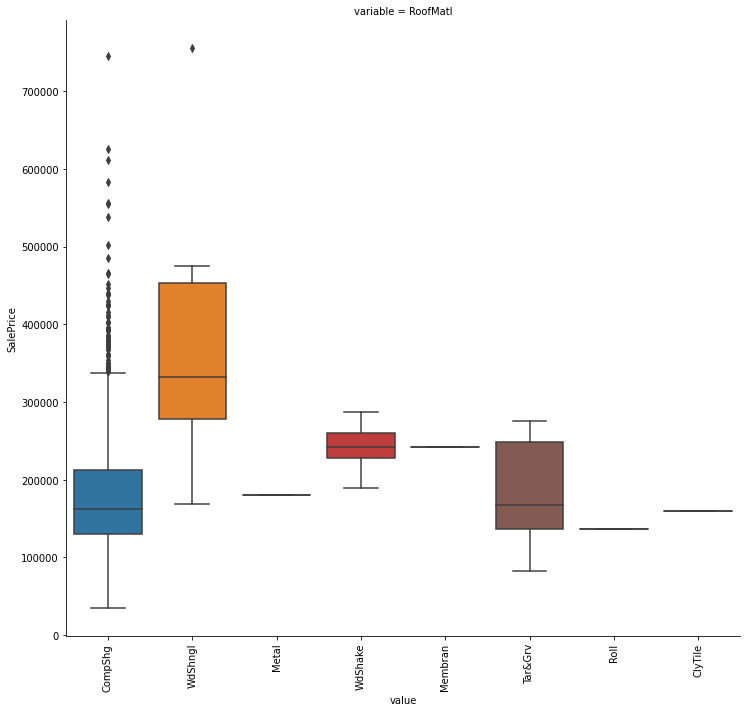


The average selling price per variable value is:
  RoofMatl      SalePrice
0  ClyTile  160000.000000
1  CompShg  179803.679219
2  Membran  241500.000000
3    Metal  180000.000000
4     Roll  137000.000000
5  Tar&Grv  185406.363636
6  WdShake  241400.000000
7  WdShngl  390250.000000



The standard deviation / spread of price per variable value is:
  RoofMatl      SalePrice
0  ClyTile            NaN
1  CompShg   77722.388636
2  Membran            NaN
3    Metal            NaN
4     Roll            NaN
5  Tar&Grv   65430.141720
6  WdShake   36218.779659
7  WdShngl  206969.019421


In [99]:
explore('RoofMatl')

In [100]:
#a majority are CompShg so is there any need in using this column when it is this skewed?

### Exterior1st: 

Exterior covering on house

AsbShng => Asbestos Shingles<br>
AsphShn => Asphalt Shingles<br>
BrkComm => Brick Common<br>
BrkFace => Brick Face<br>
CBlock => Cinder Block<br>
CemntBd => Cement Board<br>
HdBoard => Hard Board<br>
ImStucc => Imitation Stucco<br>
MetalSd => Metal Siding<br>
Other => Other<br>
Plywood => Plywood<br>
PreCast => PreCast<br>
Stone => Stone<br>
Stucco => Stucco<br>
VinylSd => Vinyl Siding<br>
Wd Sdng => Wood Siding<br>
WdShing => Wood Shingles

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
Stone       0.136986
BrkComm     0.136986
AsphShn     0.068493
ImStucc     0.068493
CBlock      0.068493
Name: Exterior1st, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



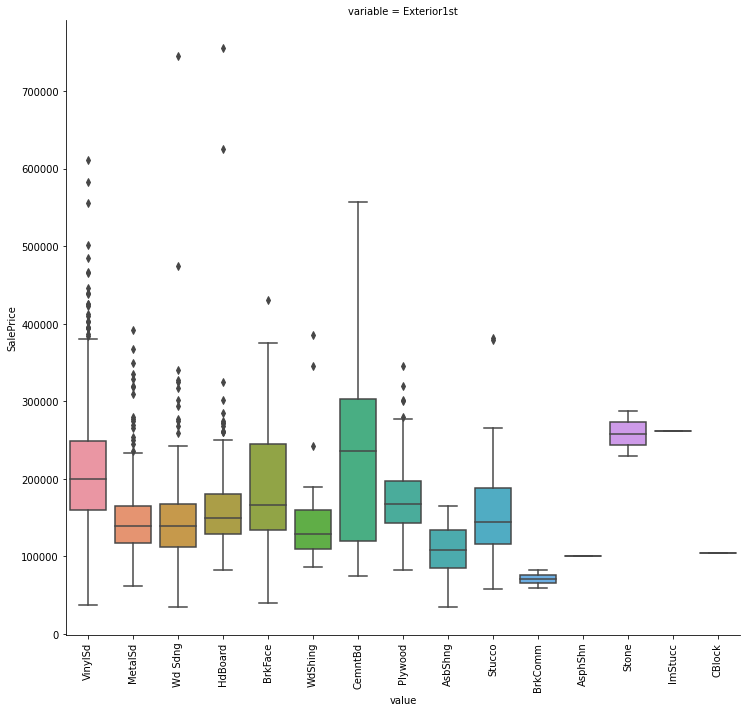


The average selling price per variable value is:
   Exterior1st      SalePrice
0      AsbShng  107385.550000
1      AsphShn  100000.000000
2      BrkComm   71000.000000
3      BrkFace  194573.000000
4       CBlock  105000.000000
5      CemntBd  231690.655738
6      HdBoard  163077.450450
7      ImStucc  262000.000000
8      MetalSd  149422.177273
9      Plywood  175942.379630
10       Stone  258500.000000
11      Stucco  162990.000000
12     VinylSd  213732.900971
13     Wd Sdng  149841.645631
14     WdShing  150655.076923



The standard deviation / spread of price per variable value is:
   Exterior1st      SalePrice
0      AsbShng   33756.480660
1      AsphShn            NaN
2      BrkComm   15556.349186
3      BrkFace   82841.914370
4       CBlock            NaN
5      CemntBd  120575.621318
6      HdBoard   66305.714164
7      ImStucc            NaN
8      MetalSd   54776.408990
9      Plywood   49497.383293
10       Stone   40305.086528
11      Stucco   83307.246529
12     VinylS

In [101]:
explore('Exterior1st')

In [102]:
#some are just very low in proportion. Maybe group them under "Other"

### Exterior2nd: 

Exterior covering on house (if more than one material)

AsbShng => Asbestos Shingles<br>
AsphShn => Asphalt Shingles<br>
BrkComm => Brick Common<br>
BrkFace => Brick Face<br>
CBlock => Cinder Block<br>
CemntBd => Cement Board<br>
HdBoard => Hard Board<br>
ImStucc => Imitation Stucco<br>
MetalSd => Metal Siding<br>
Other => Other<br>
Plywood => Plywood<br>
PreCast => PreCast<br>
Stone => Stone<br>
Stucco => Stucco<br>
VinylSd => Vinyl Siding<br>
Wd Sdng => Wood Siding<br>
WdShing => Wood Shingles

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Plywood     9.726027
CmentBd     4.109589
Wd Shng     2.602740
Stucco      1.780822
BrkFace     1.712329
AsbShng     1.369863
ImStucc     0.684932
Brk Cmn     0.479452
Stone       0.342466
AsphShn     0.205479
Other       0.068493
CBlock      0.068493
Name: Exterior2nd, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



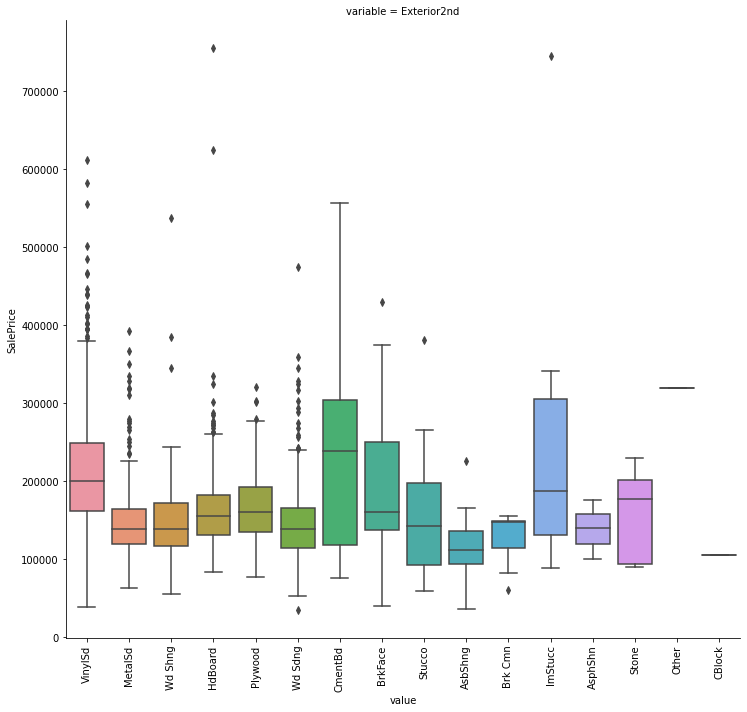


The average selling price per variable value is:
   Exterior2nd      SalePrice
0      AsbShng  114060.550000
1      AsphShn  138000.000000
2      Brk Cmn  126714.285714
3      BrkFace  195818.000000
4       CBlock  105000.000000
5      CmentBd  230093.833333
6      HdBoard  167661.565217
7      ImStucc  252070.000000
8      MetalSd  149803.172897
9        Other  319000.000000
10     Plywood  168112.387324
11       Stone  158224.800000
12      Stucco  155905.153846
13     VinylSd  214432.460317
14     Wd Sdng  148386.065990
15     Wd Shng  161328.947368



The standard deviation / spread of price per variable value is:
   Exterior2nd      SalePrice
0      AsbShng   42315.043608
1      AsphShn   37509.998667
2      Brk Cmn   38693.084161
3      BrkFace   95097.551756
4       CBlock            NaN
5      CmentBd  116140.396221
6      HdBoard   70061.078357
7      ImStucc  193176.672447
8      MetalSd   55078.595310
9        Other            NaN
10     Plywood   46955.744372
11       Ston

In [103]:
explore('Exterior2nd')

### MasVnrType: 

Masonry veneer type

BrkCmn => Brick Common<br>
BrkFace => Brick Face<br>
CBlock => Cinder Block<br>
None => None<br>
Stone => Stone

Data type of column: object
8 missing values out of 1460 ( 0.547945205479452 %)
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
None       59.504132
BrkFace    30.647383
Stone       8.815427
BrkCmn      1.033058
Name: MasVnrType, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



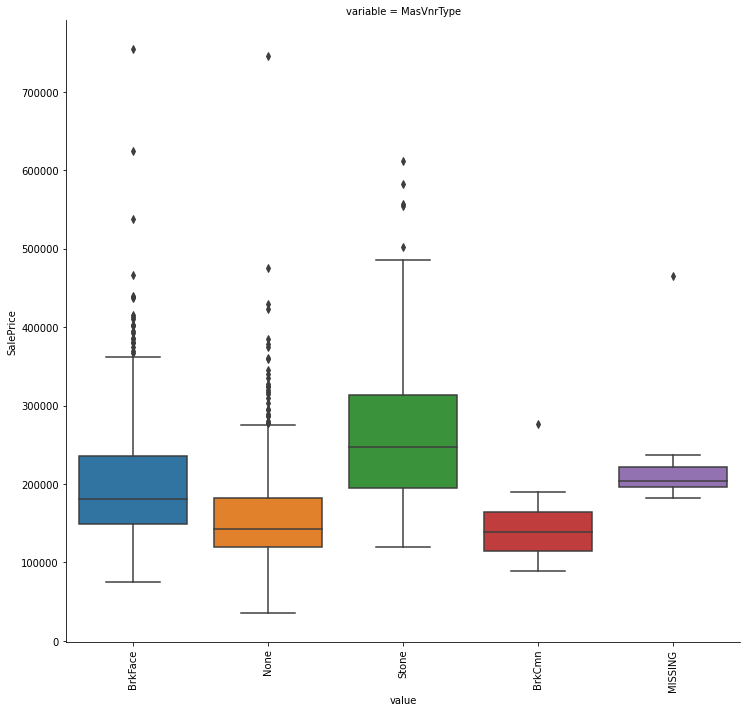


The average selling price per variable value is:
  MasVnrType      SalePrice
0     BrkCmn  146318.066667
1    BrkFace  204691.871910
2       None  156221.891204
3      Stone  265583.625000
4    MISSING  236484.250000



The standard deviation / spread of price per variable value is:
  MasVnrType     SalePrice
0     BrkCmn  46187.583632
1    BrkFace  81214.293554
2       None  60708.262798
3      Stone  99940.156577
4    MISSING  93964.474968


In [104]:
explore('MasVnrType')

### MasVnrArea: 

Masonry veneer area in square feet

In [105]:
explore('MasVnrArea')

Data type of column: float64
8 missing values out of 1460 ( 0.547945205479452 %)
0.0       861
108.0       8
72.0        8
180.0       8
16.0        7
120.0       7
340.0       6
106.0       6
200.0       6
80.0        6
84.0        5
360.0       5
132.0       5
170.0       5
320.0       5
270.0       4
336.0       4
216.0       4
252.0       4
268.0       4
183.0       4
100.0       4
196.0       4
220.0       4
40.0        4
456.0       4
76.0        4
300.0       4
210.0       4
246.0       4
288.0       4
168.0       4
160.0       4
178.0       4
50.0        3
350.0       3
240.0       3
226.0       3
42.0        3
420.0       3
90.0        3
169.0       3
272.0       3
136.0       3
116.0       3
166.0       3
99.0        3
110.0       3
176.0       3
130.0       3
312.0       3
186.0       3
148.0       3
174.0       3
128.0       3
104.0       3
82.0        3
208.0       3
70.0        3
44.0        3
256.0       3
85.0        3
74.0        3
145.0       3
105.0       2
335.0    


Variable is QUANTITATIVE


The column normality: False


In [106]:
#Can this be binned into sensible buckets?

### ExterQual: 

Evaluates the quality of the material on the exterior 

Ex => Excellent<br>
Gd => Good<br>
TA => Average/Typical<br>
Fa => Fair<br>
Po => Poor

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: ExterQual, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



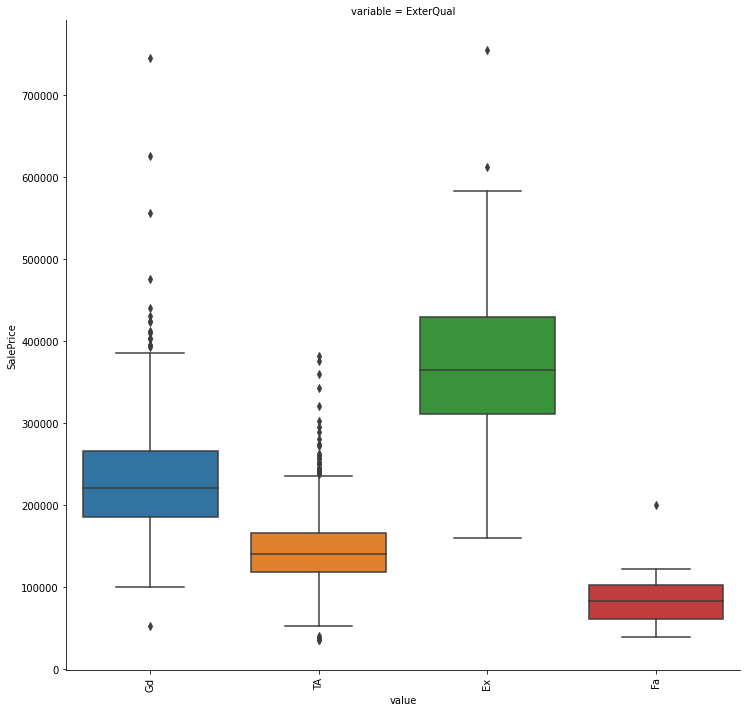


The average selling price per variable value is:
  ExterQual      SalePrice
0        Ex  367360.961538
1        Fa   87985.214286
2        Gd  231633.510246
3        TA  144341.313466



The standard deviation / spread of price per variable value is:
  ExterQual      SalePrice
0        Ex  116401.264200
1        Fa   39826.918794
2        Gd   71188.873899
3        TA   42471.815703


In [107]:
explore('ExterQual')

### ExterCond: 

Evaluates the present condition of the material on the exterior

Ex => Excellent<br>
Gd => Good<br>
TA => Average/Typical<br>
Fa => Fair<br>
Po => Poor

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
TA    87.808219
Gd    10.000000
Fa     1.917808
Ex     0.205479
Po     0.068493
Name: ExterCond, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



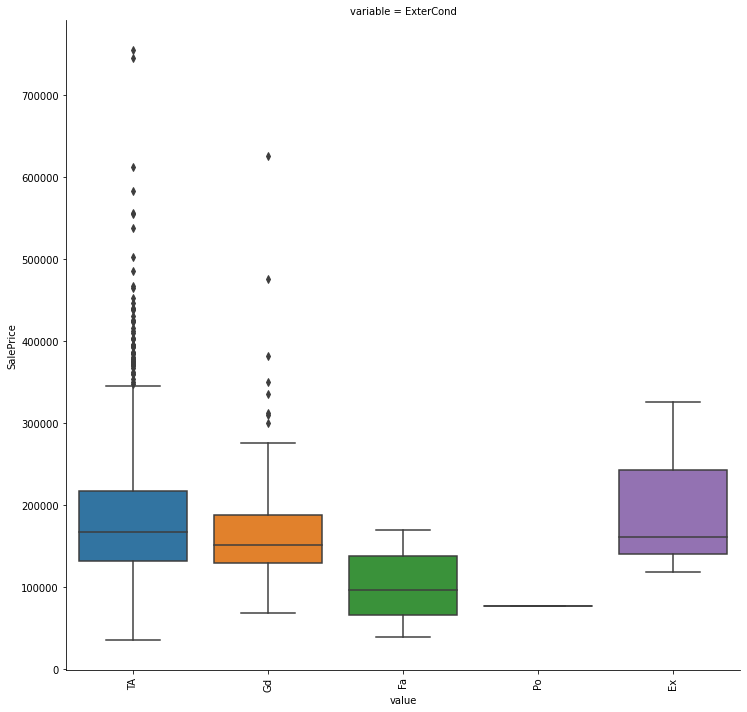


The average selling price per variable value is:
  ExterCond      SalePrice
0        Ex  201333.333333
1        Fa  102595.142857
2        Gd  168897.568493
3        Po   76500.000000
4        TA  184034.896256



The standard deviation / spread of price per variable value is:
  ExterCond      SalePrice
0        Ex  109235.220205
1        Fa   40094.383940
2        Gd   72608.303632
3        Po            NaN
4        TA   79806.257233


In [108]:
explore('ExterCond')

### Foundation: 

Type of foundation

BrkTil => Brick & Tile<br>
CBlock => Cinder Block<br>
PConc => Poured Contrete<br>
Slab => Slab<br>
Stone => Stone<br>
Wood =>Wood

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Slab       1.643836
Stone      0.410959
Wood       0.205479
Name: Foundation, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



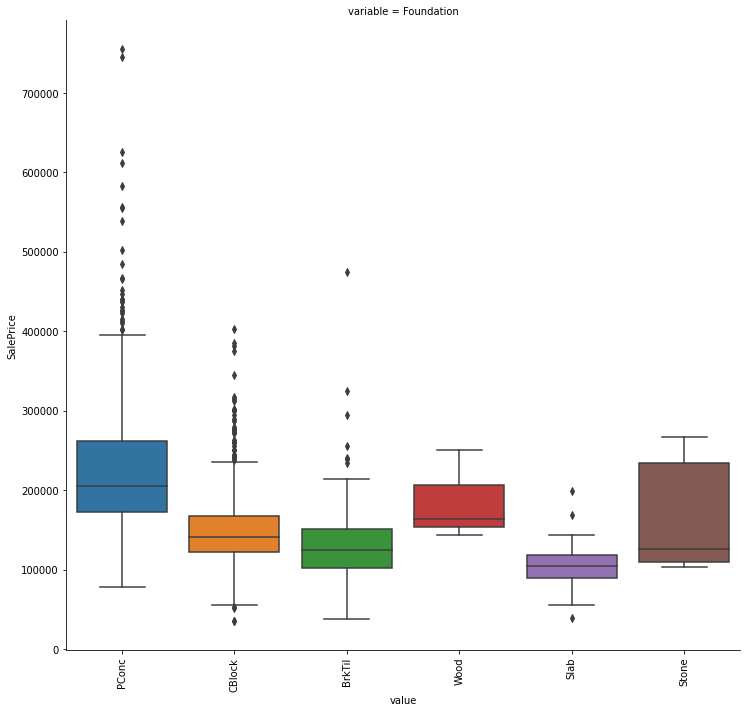


The average selling price per variable value is:
  Foundation      SalePrice
0     BrkTil  132291.075342
1     CBlock  149805.714511
2      PConc  225230.442040
3       Slab  107365.625000
4      Stone  165959.166667
5       Wood  185666.666667



The standard deviation / spread of price per variable value is:
  Foundation     SalePrice
0     BrkTil  54592.393032
1     CBlock  48295.041759
2      PConc  86865.977283
3       Slab  34213.980939
4      Stone  78557.704413
5       Wood  56695.090910


In [109]:
explore('Foundation')

### BsmtQual: 

Evaluates the height of the basement

Ex => Excellent (100+ inches)<br>
Gd => Good (90-99 inches)<br>
TA => Typical (80-89 inches)<br>
Fa => Fair (70-79 inches)<br>
Po => Poor (<70 inches)<br>
NA => No Basement

Data type of column: object
37 missing values out of 1460 ( 2.5342465753424657 %)
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    45.607871
Gd    43.429375
Ex     8.503162
Fa     2.459592
Name: BsmtQual, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



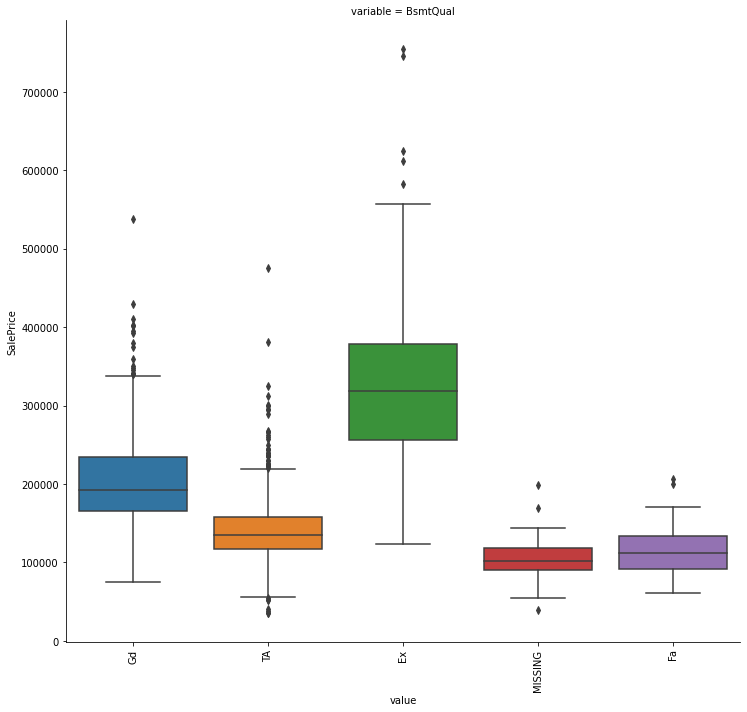


The average selling price per variable value is:
  BsmtQual      SalePrice
0       Ex  327041.041322
1       Fa  115692.028571
2       Gd  202688.478964
3       TA  140759.818182
4  MISSING  105652.891892



The standard deviation / spread of price per variable value is:
  BsmtQual      SalePrice
0       Ex  113563.237392
1       Fa   34469.667278
2       Gd   58092.364284
3       TA   43483.265311
4  MISSING   29278.694797


In [110]:
explore('BsmtQual')

### BsmtCond: 

Evaluates the general condition of the basement

Ex => Excellent<br>
Gd => Good<br>
TA => Typical - slight dampness allowed<br>
Fa => Fair - dampness or some cracking or settling<br>
Po => Poor - Severe cracking, settling, or wetness<br>
NA => No Basement

Data type of column: object
37 missing values out of 1460 ( 2.5342465753424657 %)
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
TA    92.129304
Gd     4.567814
Fa     3.162333
Po     0.140548
Name: BsmtCond, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



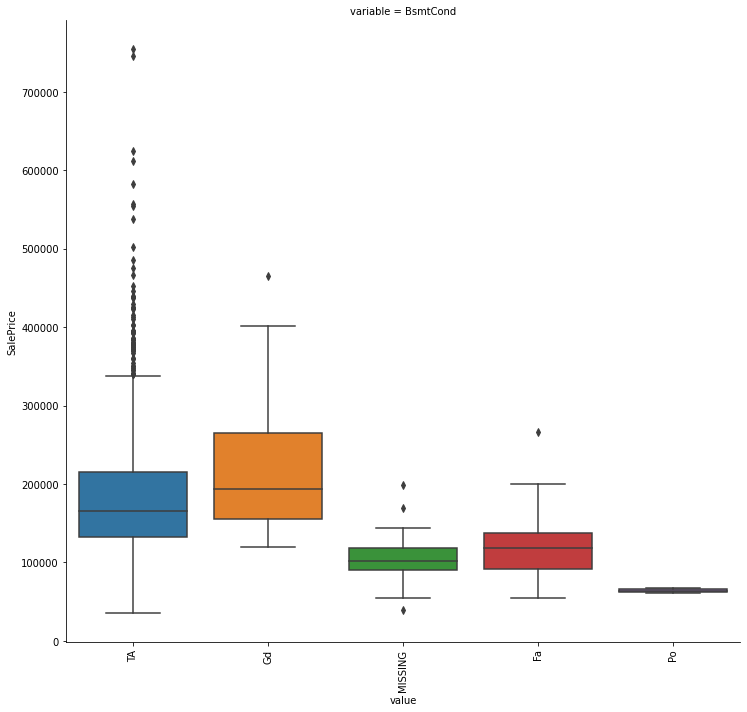


The average selling price per variable value is:
  BsmtCond      SalePrice
0       Fa  121809.533333
1       Gd  213599.907692
2       Po   64000.000000
3       TA  183632.620900
4  MISSING  105652.891892



The standard deviation / spread of price per variable value is:
  BsmtCond     SalePrice
0       Fa  43467.796975
1       Gd  72663.155026
2       Po   4242.640687
3       TA  79515.388449
4  MISSING  29278.694797


In [111]:
explore('BsmtCond')

### BsmtExposure: 

Refers to walkout or garden level walls

Gd => Good Exposure<br>
Av => Average Exposure (split levels or foyers typically score average or above)<br>
Mn => Mimimum Exposure<br>
No => No Exposure<br>
NA => No Basement

Data type of column: object
38 missing values out of 1460 ( 2.6027397260273974 %)
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
No    67.018284
Av    15.541491
Gd     9.423347
Mn     8.016878
Name: BsmtExposure, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



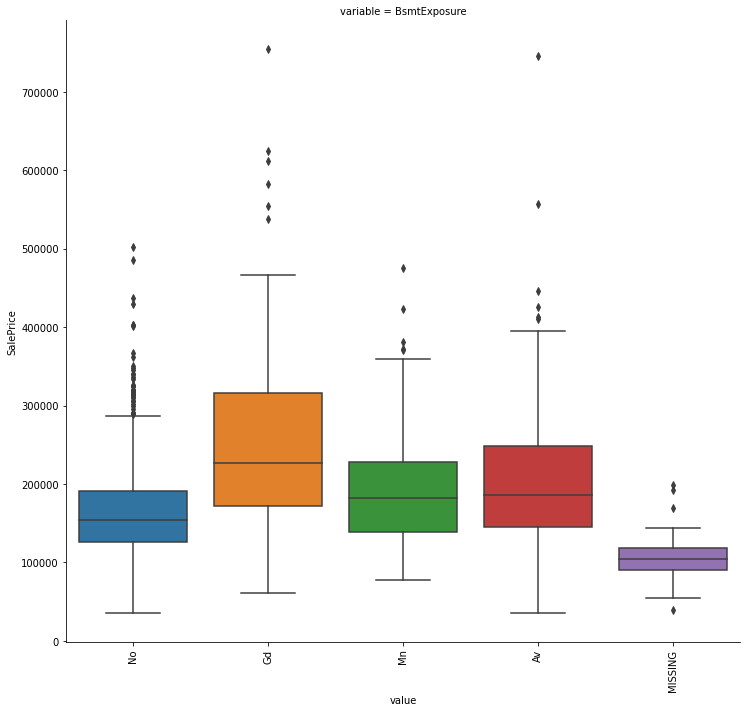


The average selling price per variable value is:
  BsmtExposure      SalePrice
0           Av  206643.420814
1           Gd  257689.805970
2           Mn  192789.657895
3           No  165652.295908
4      MISSING  107938.342105



The standard deviation / spread of price per variable value is:
  BsmtExposure      SalePrice
0           Av   88655.504849
1           Gd  118923.672583
2           Mn   77335.442652
3           No   60695.724915
4      MISSING   32133.440664


In [112]:
explore('BsmtExposure')

### BsmtFinType1: 

Rating of basement finished area

GLQ => Good Living Quarters<br>
ALQ => Average Living Quarters<br>
BLQ => Below Average Living Quarters<br>
Rec => Average Rec Room<br>
LwQ => Low Quality<br>
Unf => Unfinshed<br>
NA => No Basement

Data type of column: object
37 missing values out of 1460 ( 2.5342465753424657 %)
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    30.217850
GLQ    29.374561
ALQ    15.460295
BLQ    10.400562
Rec     9.346451
LwQ     5.200281
Name: BsmtFinType1, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



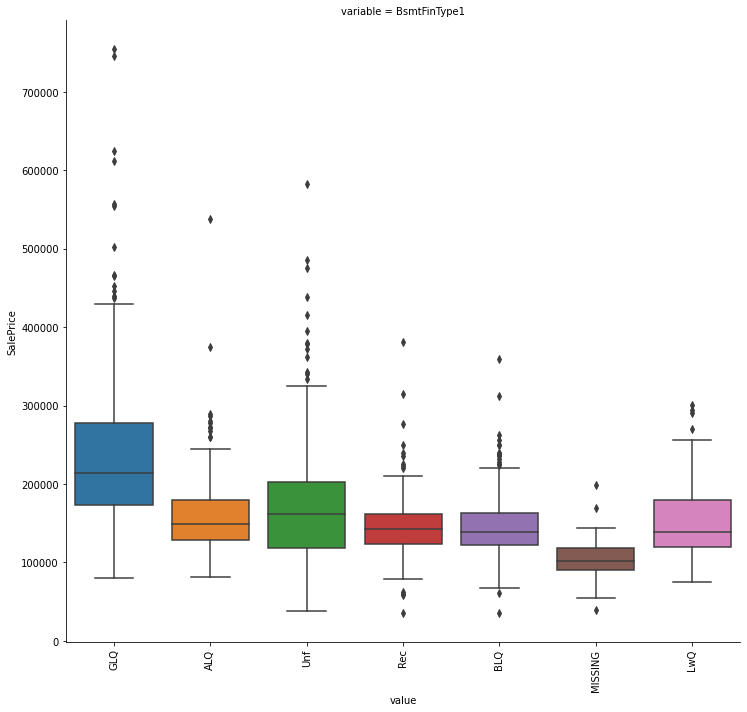


The average selling price per variable value is:
  BsmtFinType1      SalePrice
0          ALQ  161573.068182
1          BLQ  149493.655405
2          GLQ  235413.720096
3          LwQ  151852.702703
4          Rec  146889.248120
5          Unf  170670.576744
6      MISSING  105652.891892



The standard deviation / spread of price per variable value is:
  BsmtFinType1     SalePrice
0          ALQ  50821.277231
1          BLQ  47327.292126
2          GLQ  93215.613258
3          LwQ  50796.987083
4          Rec  45190.118879
5          Unf  72577.080129
6      MISSING  29278.694797


In [113]:
explore('BsmtFinType1')

### BsmtFinSF1: 

Type 1 finished square feet

In [134]:
explore("BsmtFinSF1")

Data type of column: int64
0 missing values out of 1460 ( 0.0 %)
0       467
24       12
16        9
20        5
686       5
936       5
662       5
616       5
442       4
655       4
400       4
641       4
428       4
588       4
600       4
495       4
560       4
553       4
547       4
384       4
504       4
360       4
312       4
1200      4
697       4
300       4
500       3
250       3
1274      3
280       3
288       3
490       3
1036      3
297       3
456       3
1218      3
375       3
450       3
1056      3
1201      3
425       3
403       3
336       3
338       3
340       3
507       3
378       3
570       3
510       3
672       3
789       3
767       3
812       3
816       3
828       3
733       3
732       3
700       3
695       3
690       3
685       3
680       3
674       3
660       3
528       3
659       3
656       3
648       3
643       3
633       3
626       3
625       3
624       3
904       3
595       3
247       3
569       3
565       3


Variable is QUANTITATIVE


The column normality: False


In [115]:
#this can be binned?

### BsmtFinType2: 

Rating of basement finished area (if multiple types)

GLQ => Good Living Quarters<br>
ALQ => Average Living Quarters<br>
BLQ => Below Average Living Quarters<br>
Rec => Average Rec Room<br>
LwQ => Low Quality<br>
Unf => Unfinshed<br>
NA => No Basement

Data type of column: object
38 missing values out of 1460 ( 2.6027397260273974 %)
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Unf    88.326301
Rec     3.797468
LwQ     3.234880
BLQ     2.320675
ALQ     1.336146
GLQ     0.984529
Name: BsmtFinType2, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



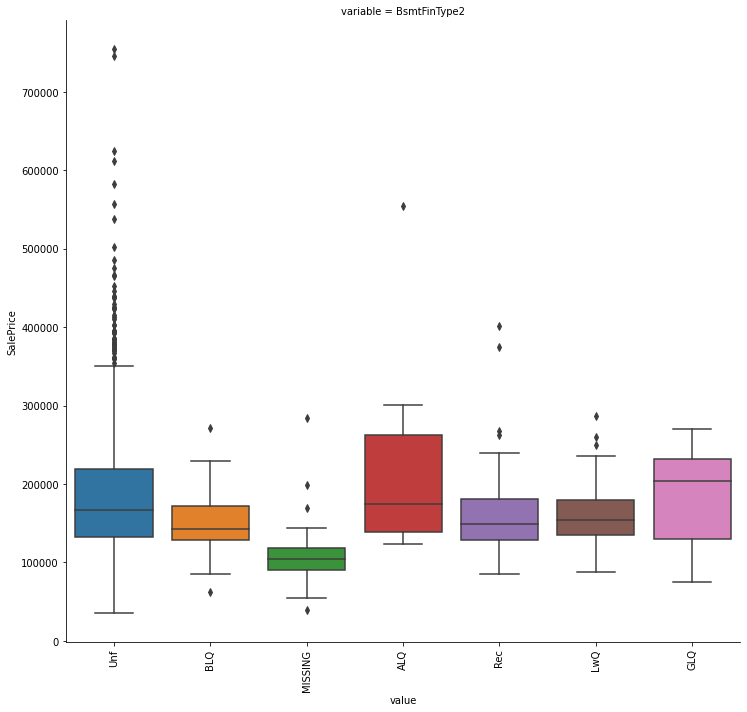


The average selling price per variable value is:
  BsmtFinType2      SalePrice
0          ALQ  209942.105263
1          BLQ  151101.000000
2          GLQ  180982.142857
3          LwQ  164364.130435
4          Rec  164917.129630
5          Unf  184694.690287
6      MISSING  110346.236842



The standard deviation / spread of price per variable value is:
  BsmtFinType2      SalePrice
0          ALQ  104764.743411
1          BLQ   41611.305388
2          GLQ   64573.040359
3          LwQ   43255.035241
4          Rec   59183.277020
5          Unf   81275.313909
6      MISSING   40879.307312


In [116]:
explore('BsmtFinType2')

In [117]:
#can I use this and previous to create a feature MultiBasementType = Yes or No only?

### BsmtFinSF2: 

Type 2 finished square feet

In [118]:
explore('BsmtFinSF2')

Data type of column: int64
0 missing values out of 1460 ( 0.0 %)
0       1293
180        5
374        3
117        2
391        2
468        2
469        2
480        2
294        2
290        2
287        2
279        2
539        2
551        2
712        2
147        2
182        2
96         2
41         2
93         2
64         2
906        1
499        1
547        1
546        1
544        1
532        1
531        1
506        1
1061       1
1063       1
1080       1
500        1
492        1
495        1
872        1
491        1
486        1
479        1
472        1
1085       1
1120       1
466        1
465        1
1127       1
441        1
438        1
1057       1
557        1
580        1
600        1
869        1
841        1
823        1
820        1
791        1
768        1
764        1
972        1
723        1
713        1
1029       1
692        1
690        1
682        1
670        1
668        1
661        1
645        1
1031       1
634        1
420        1


Variable is QUANTITATIVE


The column normality: False


### BsmtUnfSF: 

Unfinished square feet of basement area

In [119]:
explore('BsmtUnfSF')

Data type of column: int64
0 missing values out of 1460 ( 0.0 %)
0       118
728       9
384       8
572       7
600       7
300       7
270       6
280       6
440       6
625       6
672       6
390       5
410       5
216       5
108       5
490       5
319       5
264       5
326       5
80        5
162       5
816       5
698       5
747       4
163       4
168       4
186       4
192       4
847       4
780       4
884       4
276       4
768       4
284       4
912       4
312       4
544       4
536       4
336       4
340       4
350       4
360       4
684       4
660       4
392       4
396       4
125       4
638       4
420       4
611       4
556       4
324       4
840       4
36        4
92        4
115       4
88        4
100       4
402       3
317       3
230       3
756       3
310       3
75        3
408       3
936       3
316       3
288       3
686       3
504       3
210       3
208       3
506       3
318       3
203       3
864       3
952       3
522       3

Name: BsmtUnfSF, dtype: float64

Distribution of the data:




Variable is QUANTITATIVE


The column normality: False


### TotalBsmtSF: 

Total square feet of basement area

In [120]:
explore('TotalBsmtSF')

Data type of column: int64
0 missing values out of 1460 ( 0.0 %)
0       37
864     35
672     17
912     15
1040    14
816     13
728     12
768     12
780     11
848     11
894     11
832     10
630      9
952      9
756      9
1056     8
936      8
840      7
720      7
1008     7
483      7
384      7
600      7
884      6
876      6
1392     6
858      6
1362     6
796      6
684      5
1440     5
970      5
686      5
1728     5
1092     5
990      5
928      5
896      5
1144     5
992      5
793      5
960      5
764      4
689      4
616      4
588      4
1064     4
804      4
1078     4
924      4
1314     4
1080     4
1029     4
1188     4
1208     4
910      4
735      4
1026     4
880      4
980      4
1050     4
660      4
546      4
747      4
1494     4
855      4
784      4
1057     4
698      4
847      4
742      3
1214     3
783      3
975      3
729      3
1200     3
940      3
732      3
1145     3
1152     3
1164     3
1196     3
1158     3
925      3
788      3



Variable is QUANTITATIVE


The column normality: False


### Heating: 

Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: Heating, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



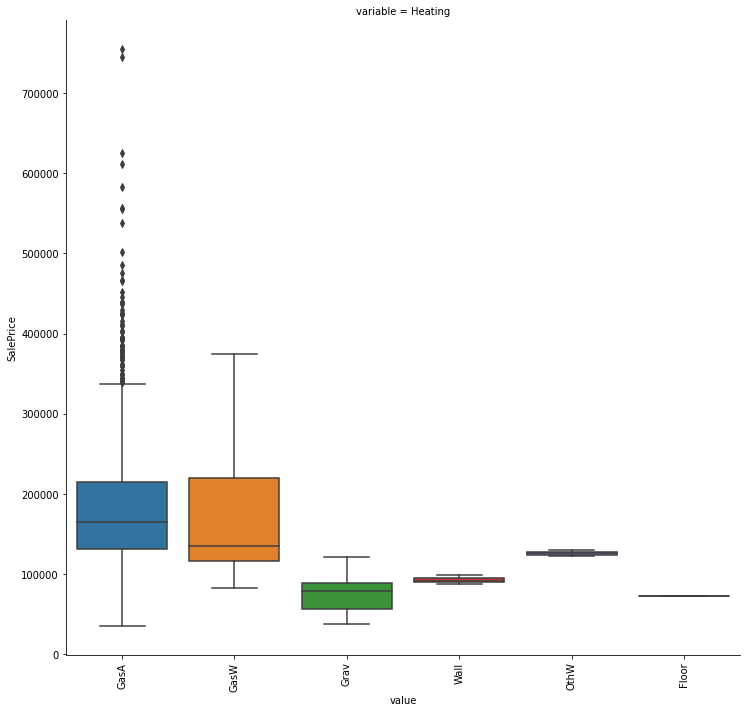


The average selling price per variable value is:
  Heating      SalePrice
0   Floor   72500.000000
1    GasA  182021.195378
2    GasW  166632.166667
3    Grav   75271.428571
4    OthW  125750.000000
5    Wall   92100.000000



The standard deviation / spread of price per variable value is:
  Heating     SalePrice
0   Floor           NaN
1    GasA  79262.873587
2    GasW  78547.575324
3    Grav  28066.570524
4    OthW   5303.300859
5    Wall   4509.988914


In [121]:
explore('Heating')

In [122]:
#extremely skewed as well towards GasA

### HeatingQC: 

Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
Ex    50.753425
TA    29.315068
Gd    16.506849
Fa     3.356164
Po     0.068493
Name: HeatingQC, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



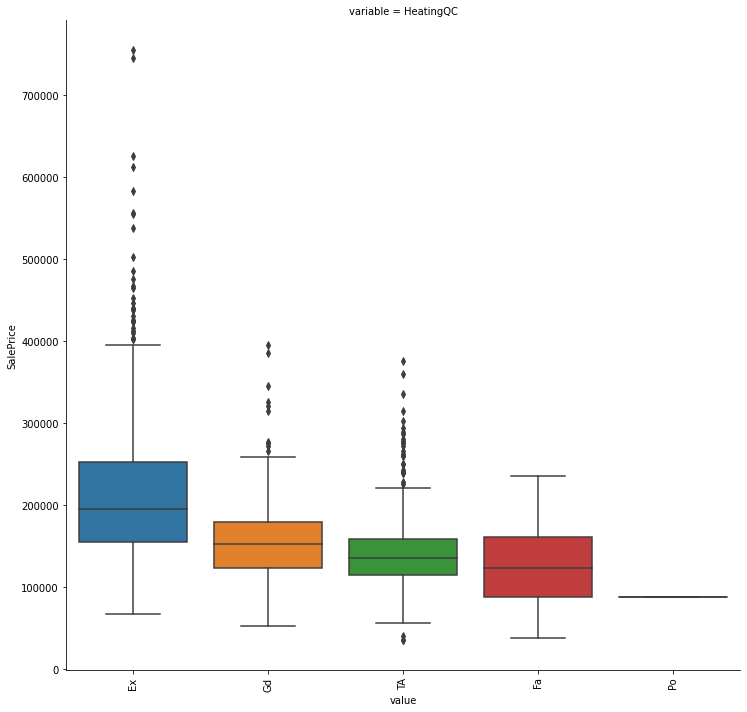


The average selling price per variable value is:
  HeatingQC      SalePrice
0        Ex  214914.429150
1        Fa  123919.489796
2        Gd  156858.871369
3        Po   87000.000000
4        TA  142362.876168



The standard deviation / spread of price per variable value is:
  HeatingQC     SalePrice
0        Ex  87469.704503
1        Fa  50306.618996
2        Gd  52923.920003
3        Po           NaN
4        TA  47226.485663


In [123]:
explore('HeatingQC')

### CentralAir: 

Central air conditioning

       N	No
       Y	Yes

Data type of column: object
0 missing values out of 1460 ( 0.0 %)
Y    1365
N      95
Name: CentralAir, dtype: int64
Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



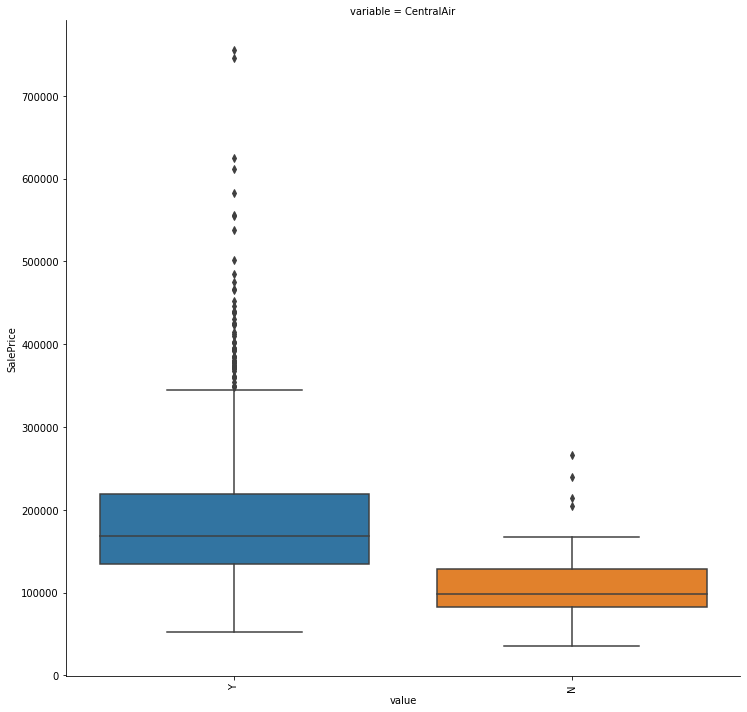


The average selling price per variable value is:
  CentralAir      SalePrice
0          N  105264.073684
1          Y  186186.709890



The standard deviation / spread of price per variable value is:
  CentralAir     SalePrice
0          N  40671.273961
1          Y  78805.206820


In [124]:
explore('CentralAir')

### Electrical: 

Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

Data type of column: object
1 missing values out of 1460 ( 0.0684931506849315 %)
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
SBrkr    91.432488
FuseA     6.442769
FuseF     1.850583
FuseP     0.205620
Mix       0.068540
Name: Electrical, dtype: float64

Distribution of the data:




Variable is QUALITATIVE



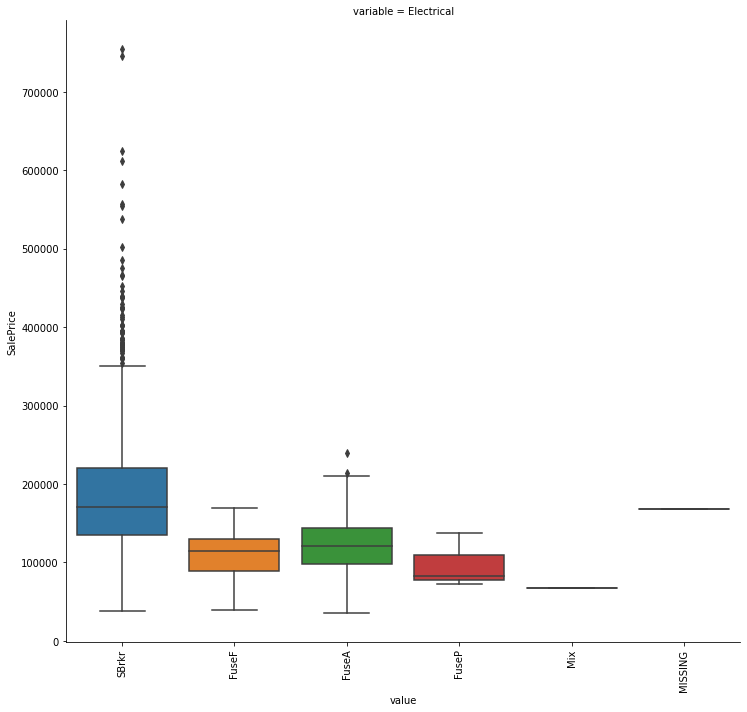


The average selling price per variable value is:
  Electrical      SalePrice
0      FuseA  122196.893617
1      FuseF  107675.444444
2      FuseP   97333.333333
3        Mix   67000.000000
4      SBrkr  186825.113193
5    MISSING  167500.000000



The standard deviation / spread of price per variable value is:
  Electrical     SalePrice
0      FuseA  37511.376615
1      FuseF  30636.507376
2      FuseP  34645.827070
3        Mix           NaN
4      SBrkr  79856.458326
5    MISSING           NaN


In [125]:
explore('Electrical')

In [126]:
#skewed towards SBrkr. Should we group the Fuse ones into one variable?

### 1stFlrSF: 

First Floor square feet

In [127]:
explore('1stFlrSF')

Data type of column: int64
0 missing values out of 1460 ( 0.0 %)
864     25
1040    16
912     14
848     12
894     12
672     11
630      9
816      9
960      7
832      7
483      7
936      7
990      6
728      6
720      6
764      6
882      6
1056     6
840      6
1728     6
1422     5
980      5
768      5
1120     5
1494     5
948      5
958      5
616      5
988      5
1144     5
1088     5
698      5
1080     5
1026     5
1072     5
1392     5
780      5
774      5
798      5
520      5
1236     5
804      5
1314     5
1200     5
796      5
858      5
860      4
1048     4
1328     4
847      4
810      4
855      4
1022     4
1004     4
892      4
970      4
1306     4
952      4
866      4
756      4
928      4
884      4
1053     4
902      4
900      4
1050     4
1337     4
1092     4
1442     4
1057     4
1164     4
1136     4
1188     4
1128     4
1086     4
1440     4
888      3
1148     3
1478     3
1134     3
1252     3
1152     3
1126     3
904      3
910      3



Variable is QUANTITATIVE


The column normality: False


### 2ndFlrSF: 

Second floor square feet

In [128]:
explore('2ndFlrSF')

Data type of column: int64
0 missing values out of 1460 ( 0.0 %)
0       829
728      10
504       9
672       8
546       8
600       7
720       7
896       6
780       5
689       5
862       5
840       5
756       5
739       4
741       4
551       4
702       4
878       4
804       4
915       3
871       3
704       3
1254      3
832       3
684       3
795       3
677       3
846       3
793       3
858       3
670       3
668       3
807       3
866       3
660       3
880       3
729       3
886       3
888       3
596       3
742       3
1177      2
1142      2
1208      2
1140      2
1101      2
716       2
709       2
1070      2
703       2
678       2
1215      2
698       2
688       2
685       2
748       2
676       2
1320      2
656       2
651       2
650       2
648       2
640       2
1330      2
625       2
744       2
765       2
754       2
755       2
842       2
844       2
850       2
860       2
978       2
864       2
872       2
876       2
975       2


Variable is QUANTITATIVE


The column normality: False


### LowQualFinSF: 

Low quality finished square feet (all floors)

In [ ]:
explore('LowQualFinSF')

In [ ]:
#skewed towards 0

### GrLivArea: 

Above grade (ground) living area square feet

In [ ]:
explore('GrLivArea')

### BsmtFullBath: 

Basement full bathrooms

In [ ]:
explore('BsmtFullBath')

### BsmtHalfBath: 

Basement half bathrooms

In [ ]:
explore('BsmtHalfBath')

In [ ]:
#many don't have half bathrooms in the basement

### FullBath: 

Full bathrooms above ground

In [ ]:
explore('FullBath')

### HalfBath: 

Half baths above ground

In [ ]:
explore('HalfBath')

### BedroomAbvGr: 

Bedrooms above grade (does NOT include basement bedrooms)

In [ ]:
explore('BedroomAbvGr')

### KitchenAbvGr: 

Kitchens above grade

In [ ]:
explore('KitchenAbvGr')

### KitchenQual: 

Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [ ]:
explore('KitchenQual')

### TotRmsAbvGrd: 

Total rooms above grade (does not include bathrooms)

In [ ]:
explore('TotRmsAbvGrd')

### Functional: 

Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [ ]:
explore('Functional')

In [ ]:
#most are for typical functionality. Should the rest be "Other functionality"?

### Fireplaces: 

Number of fireplaces

In [ ]:
explore('Fireplaces')

### FireplaceQu: 

Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [ ]:
explore('FireplaceQu')

### GarageType: 

Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [ ]:
explore('GarageType')

In [ ]:
#create a feature that just has whether there is a Garage = Yes or No

### GarageYrBlt: 

Year garage was built

In [ ]:
explore('GarageYrBlt')

In [ ]:
#Maybe we can create a  GarageAge feature as the year doesn't really matter?

### GarageFinish: 

Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [ ]:
explore('GarageFinish')

### GarageCars: 

Size of garage in car capacity

In [ ]:
explore('GarageCars')

### GarageArea: 

Size of garage in square feet

In [ ]:
explore('GarageArea')

In [ ]:
#is this necessary when people measure using how many cars can fit i.e. GarageCars?

### GarageQual: 

Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [ ]:
explore('GarageQual')

In [ ]:
#most garages are just average quality

### GarageCond: 

Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [ ]:
explore('GarageCond')

In [ ]:
#what's the difference between Garage Quality and Garage Condition? They don't seem very different

### PavedDrive: 

Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

In [ ]:
explore('PavedDrive')

### WoodDeckSF: 

Wood deck area in square feet

In [ ]:
explore('WoodDeckSF')

### OpenPorchSF: 

Open porch area in square feet

In [ ]:
explore('OpenPorchSF')

### EnclosedPorch: 

Enclosed porch area in square feet

In [ ]:
explore('EnclosedPorch')

### 3SsnPorch: 

Three season porch area in square feet

In [ ]:
explore('3SsnPorch')

In [ ]:
#many houses do not have 3 season porches so might not be useful

### ScreenPorch: 

Screen porch area in square feet

In [ ]:
explore('ScreenPorch')

In [ ]:
#many houses do not have ScreenPorches

### PoolArea: 

Pool area in square feet

In [ ]:
explore('PoolArea')

In [ ]:
#almost all houses do not have swimming pools

### PoolQC: 

Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [ ]:
explore('PoolQC')

### Fence: 

Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [ ]:
explore('Fence')

In [ ]:
#simple feature here is to HasFence = Yes or No only

### MiscFeature: 

Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [ ]:
explore('MiscFeature')

### MiscVal: 

Value of miscellaneous feature

In [ ]:
explore('MiscVal')

In [ ]:
#no value because many houses do not have an misc features. Might not be useful

### MoSold: 

Month Sold (MM)

In [ ]:
explore('MoSold')

### YrSold: 

Year Sold (YYYY)

In [ ]:
explore("YrSold")

### SaleType: 

Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [ ]:
explore('SaleType')

### SaleCondition: 

Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [ ]:
explore('SaleCondition')

### Correlations

In [ ]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(train, features)